## Módulos

Instalamos algunos paquetes necesarios

In [ ]:
!pip install gsw
!python -m pip install motuclient==1.8.4 --no-cache-dir  

     |████████████████████████████████| 2.4 MB 4.9 MB/s 
  Created wheel for motuclient: filename=motuclient-1.8.4-py3-none-any.whl size=32877 sha256=4d5a9bc9f5ac606977d163e2f3532b9720b165a07a079ab1123bf8399e01c4c9
  Stored in directory: /tmp/pip-ephem-wheel-cache-y02435ho/wheels/1b/64/40/41bc3245f6d57b72afc3625434ff402eb10d04ec3dd034b600
Successfully built motuclient


In [ ]:
# Downloading the Cartopy maps from AWS
!pip install --no-binary shapely shapely --force
!pip install cartopy
!wget https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
!python cartopy_feature_download.py physical
!python cartopy_feature_download.py cultural

     |████████████████████████████████| 198 kB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.1.post1-cp37-cp37m-linux_x86_64.whl size=665660 sha256=7a861b7224152bfd5e878f4f73c2de3f5c5163ff97c933c92fd461be3f2fbb72
  Stored in directory: /root/.cache/pip/wheels/ea/8d/2f/ab748b8a432b3c6cd72e751b3bca17c5a9ed4538b1e78467e6
Successfully built shapely
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.1.post1
    Uninstalling Shapely-1.8.1.post1:
      Successfully uninstalled Shapely-1.8.1.post1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 10.8 MB 5.4 MB/s 
  In

Importamos los paquetes necesarios

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import xarray as xr
import gsw
#import random
import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Conectamos con nuestro google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Definimos algunas funciones útiles para graficar

In [ ]:
def plot_map(darr):
  map_proj = ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0, globe=None);
  fig = plt.figure(figsize=(9, 10))
  fig.add_subplot(1,1,1, projection=map_proj)
  ax = darr.plot(transform=ccrs.PlateCarree()).axes;
  ax.add_feature(cfeature.LAND, facecolor='lightgray')
  ax.coastlines(resolution='50m');

## EKE 

### Descarga de Datos

Descargamos los datos de velocidad de corriente para la región del Ártico desde el año de 1993 hasta 2021 de observaciones satelitales del  *Altimeter satellite gridded Sea Level Anomalies (SLA) computed with respect to a twenty-year [1993, 2012] mean.* resolucion 0.25

In [ ]:
!python -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service SEALEVEL_GLO_PHY_L4_MY_008_047-TDS --product cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D --longitude-min -65.26933727897664 --longitude-max -26.09741046596361 --latitude-min 46.208600097865286 --latitude-max 69.69177050872769 --date-min "2015-01-01 00:00:00" --date-max "2021-08-02 23:59:59" --variable ugosa --variable vgosa --out-dir "/content" --out-name "ds_uv_2015-2021.nc" --user "gcuervolondoo" --pwd "Primitivo3345#"
!python -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service SEALEVEL_GLO_PHY_L4_MY_008_047-TDS --product cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D --longitude-min -65.26933727897664 --longitude-max -26.09741046596361 --latitude-min 46.208600097865286 --latitude-max 69.69177050872769 --date-min "2010-01-01 00:00:00" --date-max "2014-12-31 00:00:00" --variable ugosa --variable vgosa --out-dir "/content" --out-name "ds_uv_2010-2014.nc" --user "gcuervolondoo" --pwd "Primitivo3345#"
!python -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service SEALEVEL_GLO_PHY_L4_MY_008_047-TDS --product cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D --longitude-min -65.26933727897664 --longitude-max -26.09741046596361 --latitude-min 46.208600097865286 --latitude-max 69.69177050872769 --date-min "2000-01-01 00:00:00" --date-max "2009-12-31 00:00:00" --variable ugosa --variable vgosa --out-dir "/content" --out-name "ds_uv_2000-2009.nc" --user "gcuervolondoo" --pwd "Primitivo3345#"
!python -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service SEALEVEL_GLO_PHY_L4_MY_008_047-TDS --product cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D --longitude-min -65.26933727897664 --longitude-max -26.09741046596361 --latitude-min 46.208600097865286 --latitude-max 69.69177050872769 --date-min "1993-01-01 00:00:00" --date-max "1999-12-31 00:00:00" --variable ugosa --variable vgosa --out-dir "/content" --out-name "ds_uv_1993-1999.nc" --user "gcuervolondoo" --pwd "Primitivo3345#"

2022-03-28 15:02:50.995 [ INFO] Asynchronous mode set
2022-03-28 15:02:50.996 [ INFO] Authenticating user gcuervolondoo for service https://my.cmems-du.eu/motu-web/Motu
2022-03-28 15:02:51.571 [ INFO] Requesting file to download (this can take a while)...
2022-03-28 15:02:56.928 [ INFO] Authenticating user gcuervolondoo for service https://my.cmems-du.eu/motu-web/Motu
2022-03-28 15:03:02.795 [ INFO] Product is not yet available (request in progress)
2022-03-28 15:03:12.806 [ INFO] Authenticating user gcuervolondoo for service https://my.cmems-du.eu/motu-web/Motu
2022-03-28 15:03:18.617 [ INFO] Product is not yet available (request in progress)
2022-03-28 15:03:28.618 [ INFO] Authenticating user gcuervolondoo for service https://my.cmems-du.eu/motu-web/Motu
2022-03-28 15:03:34.452 [ INFO] Product is not yet available (request in progress)
2022-03-28 15:03:44.460 [ INFO] Authenticating user gcuervolondoo for service https://my.cmems-du.eu/motu-web/Motu
2022-03-28 15:03:50.223 [ INFO] Pro

In [ ]:
#cargamos los dataset descargados
ds_1993_99 = xr.open_dataset("/content/ds_uv_1993-1999.nc")
ds_2000_09 = xr.open_dataset("/content/ds_uv_2000-2009.nc")
ds_2010_14 = xr.open_dataset("/content/ds_uv_2010-2014.nc")
ds_2015_21 = xr.open_dataset("/content/ds_uv_2015-2021.nc")
#Calculamos la media por ano para agrupar los datos
ds_1993_99 = ds_1993_99.groupby('time.year').mean()
ds_2000_09 = ds_2000_09.groupby('time.year').mean()
ds_2010_14 = ds_2010_14.groupby('time.year').mean()
ds_2015_21 = ds_2015_21.groupby('time.year').mean()

In [ ]:
#extraemos metadatos
dic_uv_attr = xr.open_dataset("/content/ds_uv_2015-2021.nc").attrs
dic_u_attr = xr.open_dataset("/content/ds_uv_2015-2021.nc").ugosa.attrs
dic_v_attr = xr.open_dataset("/content/ds_uv_2015-2021.nc").vgosa.attrs

In [ ]:
#unimos los datarray
ds_uv_year = xr.combine_by_coords([ds_1993_99, ds_2000_09, ds_2010_14, ds_2015_21])
#anadimos metadatos
ds_uv_year = ds_uv_year.assign_attrs(dic_uv_attr)
ds_uv_year['ugosa'] = ds_uv_year.ugosa.assign_attrs(dic_u_attr)
ds_uv_year['vgosa'] = ds_uv_year.vgosa.assign_attrs(dic_v_attr)
#guardamos en el google drive
pathdir = "/content/drive/MyDrive/ULPGC/Singulares/Poster/"
ds_uv_year.to_netcdf(pathdir+'ds_uv_year.nc')

### Calculo de EKE

In [ ]:
xr.set_options(keep_attrs=True)

In [ ]:
#cargamos el dataset desde google drive
pathdir = "/content/drive/MyDrive/ULPGC/Singulares/Poster/"
ds_uv_year = xr.open_dataset(pathdir+"ds_uv_year.nc")
ds_uv_year

<xarray.Dataset>
Dimensions:    (latitude: 95, longitude: 158, year: 29)
Coordinates:
  * latitude   (latitude) float32 46.12 46.38 46.62 46.88 ... 69.12 69.38 69.62
  * longitude  (longitude) float32 -65.38 -65.12 -64.88 ... -26.62 -26.38 -26.12
  * year       (year) int64 1993 1994 1995 1996 1997 ... 2018 2019 2020 2021
Data variables:
    vgosa      (year, latitude, longitude) float64 ...
    crs        (year) float64 ...
    ugosa      (year, latitude, longitude) float64 ...
Attributes: (12/45)
    Conventions:                                    CF-1.6
    FROM_ORIGINAL_FILE__Metadata_Conventions:       Unidata Dataset Discovery...
    cdm_data_type:                                  Grid
    comment:                                        Sea Surface Height measur...
    contact:                                        servicedesk.cmems@mercato...
    creator_email:                                  servicedesk.cmems@mercato...
    ...                                             ...
    time_coverage_duration:                         P1D
    time_coverage_end:                              2021-08-02T12:00:00Z
    time_coverage_resolution:                       P1D
    time_coverage_start:                            2021-08-01T12:00:00Z
    title:                                          DT merged all satellites ...
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

Calculamos la Energía Cinetica de Eddy EKE:

$$EKE = \frac{1}{2} (\overline{u'^2 + v'^2})$$

In [ ]:
u_a2 = (ds_uv_year.ugosa*100)**2 #El 100 es para pasar de m a cm
v_a2 = (ds_uv_year.vgosa*100)**2
ds_uv_year = ds_uv_year.assign(EKE_t= 0.5*(u_a2.mean(dim=('latitude','longitude')) + v_a2.mean(dim=('latitude','longitude')))) #para pasar de metros a cm
ds_uv_year['EKE_t'] = ds_uv_year.EKE_t.assign_attrs({'standard_name':'Eddy Kinetic Energy',
                                                     'long_name': 'EKE time series',
                                                     'units': '$cm^2/s^2$'})
ds_uv_year = ds_uv_year.assign(EKE_lat= 0.5*(u_a2.mean(dim=('longitude')) + v_a2.mean(dim=('longitude')))) 
ds_uv_year['EKE_lat'] = ds_uv_year.EKE_lat.assign_attrs({'standard_name':'Eddy Kinetic Energy',
                                                         'long_name': 'EKE zonal',
                                                         'units': '$cm^2/s^2$'})
ds_uv_year = ds_uv_year.assign(EKE_lon= 0.5*(u_a2.mean(dim=('latitude')) + v_a2.mean(dim=('latitude')))) 
ds_uv_year['EKE_lon'] = ds_uv_year.EKE_lon.assign_attrs({'standard_name':'Eddy Kinetic Energy',
                                                         'long_name': 'EKE meridional',
                                                         'units': '$cm^2/s^2$'})
ds_uv_year = ds_uv_year.assign(EKE= 0.5*(u_a2.mean(dim='year') + v_a2.mean(dim='year'))) #para pasar de metros a cm
ds_uv_year['EKE'] = ds_uv_year.EKE.assign_attrs({'standard_name':'Eddy Kinetic Energy',
                                                 'long_name': 'EKE',
                                                 'units': '$cm^2/s^2$'})
ds_uv_year

<xarray.Dataset>
Dimensions:    (latitude: 95, longitude: 158, year: 29)
Coordinates:
  * latitude   (latitude) float32 46.12 46.38 46.62 46.88 ... 69.12 69.38 69.62
  * longitude  (longitude) float32 -65.38 -65.12 -64.88 ... -26.62 -26.38 -26.12
  * year       (year) int64 1993 1994 1995 1996 1997 ... 2018 2019 2020 2021
Data variables:
    vgosa      (year, latitude, longitude) float64 nan nan nan ... nan nan nan
    crs        (year) float64 -2.147e+09 -2.147e+09 ... -2.147e+09 -2.147e+09
    ugosa      (year, latitude, longitude) float64 nan nan nan ... nan nan nan
    EKE_t      (year) float64 8.807 7.746 6.776 6.553 ... 9.351 9.712 16.86
    EKE_lat    (year, latitude) float64 15.41 13.39 15.4 ... 1.133 1.552 7.316
    EKE_lon    (year, longitude) float64 2.475 3.45 2.681 ... 25.05 26.91 21.32
    EKE        (latitude, longitude) float64 nan nan nan nan ... nan nan nan nan
Attributes: (12/45)
    Conventions:                                    CF-1.6
    FROM_ORIGINAL_FILE__Metadata_Conventions:       Unidata Dataset Discovery...
    cdm_data_type:                                  Grid
    comment:                                        Sea Surface Height measur...
    contact:                                        servicedesk.cmems@mercato...
    creator_email:                                  servicedesk.cmems@mercato...
    ...                                             ...
    time_coverage_duration:                         P1D
    time_coverage_end:                              2021-08-02T12:00:00Z
    time_coverage_resolution:                       P1D
    time_coverage_start:                            2021-08-01T12:00:00Z
    title:                                          DT merged all satellites ...
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

In [ ]:
ds_uv_year['EKE_t'] = ds_uv_year.EKE_t.assign_attrs({'long_name':'Eddy Kinetic Energy',
                                                  'units': 'cm2/s2'})
ds_uv_year.EKE_t

<xarray.DataArray 'EKE_t' (year: 29)>
array([ 8.80742185,  7.74630163,  6.77633728,  6.55302467,  6.67518807,
        7.16108685,  7.29300974,  8.62326992,  7.24890838,  7.66085133,
        8.84944473,  7.56479236,  7.27076013,  8.03541979,  6.87177997,
        8.8808335 ,  8.31586019,  8.5840085 ,  9.06388743,  8.88757629,
        9.06090303,  9.01034616,  7.92919428, 10.19350638, 11.52677054,
        9.06748673,  9.35067634,  9.71200932, 16.86014474])
Coordinates:
  * year     (year) int64 1993 1994 1995 1996 1997 ... 2017 2018 2019 2020 2021
Attributes:
    ancillary_variables:  err_ugosa
    comment:              The geostrophic velocity anomalies are referenced t...
    grid_mapping:         crs
    long_name:            Eddy Kinetic Energy
    standard_name:        Eddy Kinetic Energy
    units:                cm2/s2
    _ChunkSizes:          [ 1 50 50]

In [ ]:
u_a2_WGC = u_a2.sel(latitude=slice(56, 66), longitude=slice(-58, -45))
v_a2_WGC = v_a2.sel(latitude=slice(56, 66), longitude=slice(-58, -45))
ds_WGC = xr.Dataset()
ds_WGC = ds_WGC.assign(EKE_t_WGC= 0.5*(u_a2_WGC.mean(dim=('latitude','longitude')) + v_a2_WGC.mean(dim=('latitude','longitude')))) #para pasar de metros a cm
ds_WGC = ds_WGC.assign(EKE_WGC= 0.5*(u_a2_WGC.mean(dim='year') + v_a2_WGC.mean(dim='year'))) #para pasar de metros a cm
ds_WGC

<xarray.Dataset>
Dimensions:    (latitude: 40, longitude: 52, year: 29)
Coordinates:
  * year       (year) int64 1993 1994 1995 1996 1997 ... 2018 2019 2020 2021
  * latitude   (latitude) float32 56.12 56.38 56.62 56.88 ... 65.38 65.62 65.88
  * longitude  (longitude) float32 -57.88 -57.62 -57.38 ... -45.62 -45.38 -45.12
Data variables:
    EKE_t_WGC  (year) float64 1.653 1.64 1.551 3.508 ... 2.443 2.758 2.748 4.882
    EKE_WGC    (latitude, longitude) float64 1.894 2.366 2.846 ... nan nan nan

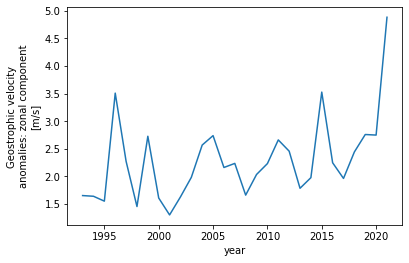

In [ ]:
ds_WGC.EKE_t_WGC.plot()

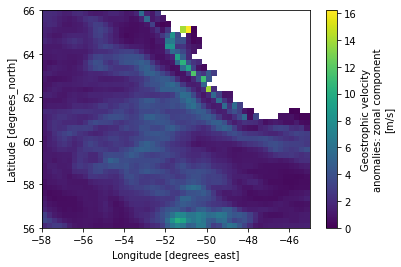

In [ ]:
ds_WGC.EKE_WGC.plot()

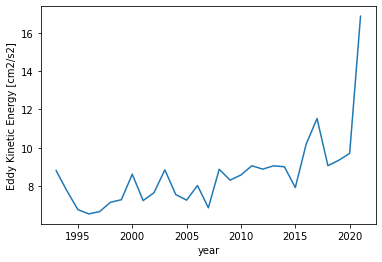

In [ ]:
ds_uv_year.EKE_t.plot()

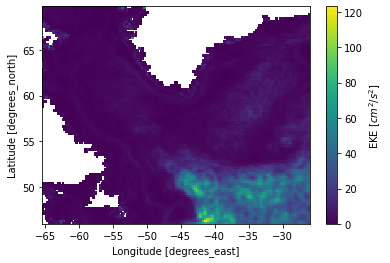

In [ ]:
ds_uv_year.EKE.plot()

### Calculo de $V_{EKE}$
Ahora calculamos la Velocidad EKE es el RMS del EKE:

$$V_{EKE} = \sqrt{2EKE}$$

In [ ]:
ds_uv_year = ds_uv_year.assign(V_EKE_lon= np.sqrt(2*ds_uv_year.EKE_lon))
ds_uv_year['V_EKE_lon'] = ds_uv_year.V_EKE_lon.assign_attrs({'standard_name':'Velocidad EKE',
                                                             'long_name': '$V_{EKE}$ meridional',
                                                             'units': '$cm/s$'})
ds_uv_year = ds_uv_year.assign(V_EKE_lat= np.sqrt(2*ds_uv_year.EKE_lat))
ds_uv_year['V_EKE_lat'] = ds_uv_year.V_EKE_lat.assign_attrs({'standard_name':'Velocidad EKE',
                                                             'long_name': '$V_{EKE}$ zonal',
                                                             'units': '$cm/s$'})
ds_uv_year = ds_uv_year.assign(V_EKE= np.sqrt(2*ds_uv_year.EKE))
ds_uv_year['V_EKE'] = ds_uv_year.V_EKE.assign_attrs({'standard_name':'Velocidad EKE',
                                                     'long_name': '$V_{EKE}$',
                                                     'units': '$cm/s$'})
ds_uv_year = ds_uv_year.assign(V_EKE_t= np.sqrt(2*ds_uv_year.EKE_t))
ds_uv_year['V_EKE_t'] = ds_uv_year.V_EKE_t.assign_attrs({'standard_name':'Velocidad EKE',
                                                         'long_name': '$V_{EKE}$ Serie temporal',
                                                         'units': '$cm/s$'})
ds_uv_year

<xarray.Dataset>
Dimensions:    (latitude: 95, longitude: 158, year: 29)
Coordinates:
  * latitude   (latitude) float32 46.12 46.38 46.62 46.88 ... 69.12 69.38 69.62
  * longitude  (longitude) float32 -65.38 -65.12 -64.88 ... -26.62 -26.38 -26.12
  * year       (year) int64 1993 1994 1995 1996 1997 ... 2018 2019 2020 2021
Data variables:
    vgosa      (year, latitude, longitude) float64 nan nan nan ... nan nan nan
    crs        (year) float64 -2.147e+09 -2.147e+09 ... -2.147e+09 -2.147e+09
    ugosa      (year, latitude, longitude) float64 nan nan nan ... nan nan nan
    EKE_t      (year) float64 8.807 7.746 6.776 6.553 ... 9.351 9.712 16.86
    EKE_lat    (year, latitude) float64 15.41 13.39 15.4 ... 1.133 1.552 7.316
    EKE_lon    (year, longitude) float64 2.475 3.45 2.681 ... 25.05 26.91 21.32
    EKE        (latitude, longitude) float64 nan nan nan nan ... nan nan nan nan
    V_EKE_lon  (year, longitude) float64 2.225 2.627 2.316 ... 7.079 7.337 6.53
    V_EKE_lat  (year, latitude) float64 5.552 5.174 5.551 ... 1.505 1.762 3.825
    V_EKE      (latitude, longitude) float64 nan nan nan nan ... nan nan nan nan
    V_EKE_t    (year) float64 4.197 3.936 3.681 3.62 ... 4.259 4.325 4.407 5.807
Attributes: (12/45)
    Conventions:                                    CF-1.6
    FROM_ORIGINAL_FILE__Metadata_Conventions:       Unidata Dataset Discovery...
    cdm_data_type:                                  Grid
    comment:                                        Sea Surface Height measur...
    contact:                                        servicedesk.cmems@mercato...
    creator_email:                                  servicedesk.cmems@mercato...
    ...                                             ...
    time_coverage_duration:                         P1D
    time_coverage_end:                              2021-08-02T12:00:00Z
    time_coverage_resolution:                       P1D
    time_coverage_start:                            2021-08-01T12:00:00Z
    title:                                          DT merged all satellites ...
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

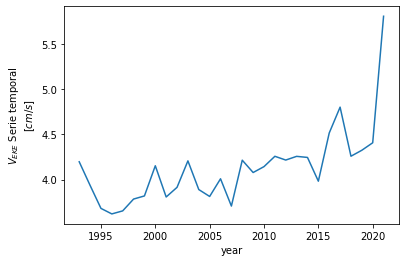

In [ ]:
ds_uv_year.V_EKE_t.plot()

In [ ]:
ds_WGC = ds_WGC.assign(V_EKE= np.sqrt(2*ds_WGC.EKE_WGC))
ds_WGC = ds_WGC.assign(V_EKE_t= np.sqrt(2*ds_WGC.EKE_t_WGC))
ds_WGC

<xarray.Dataset>
Dimensions:    (latitude: 40, longitude: 52, year: 29)
Coordinates:
  * year       (year) int64 1993 1994 1995 1996 1997 ... 2018 2019 2020 2021
  * latitude   (latitude) float32 56.12 56.38 56.62 56.88 ... 65.38 65.62 65.88
  * longitude  (longitude) float32 -57.88 -57.62 -57.38 ... -45.62 -45.38 -45.12
Data variables:
    EKE_t_WGC  (year) float64 1.653 1.64 1.551 3.508 ... 2.443 2.758 2.748 4.882
    EKE_WGC    (latitude, longitude) float64 1.894 2.366 2.846 ... nan nan nan
    V_EKE      (latitude, longitude) float64 1.946 2.175 2.386 ... nan nan nan
    V_EKE_t    (year) float64 1.818 1.811 1.762 2.649 ... 2.21 2.349 2.344 3.125

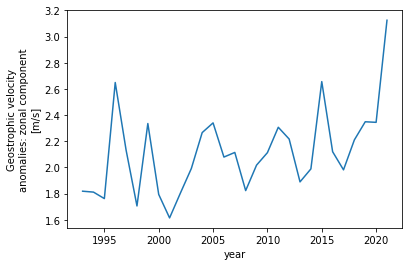

In [ ]:
ds_WGC.V_EKE_t.plot()

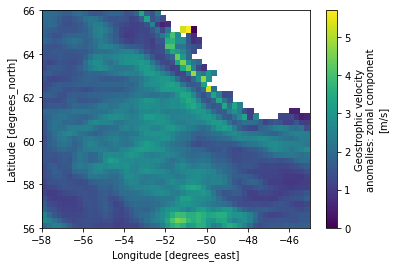

In [ ]:
ds_WGC.V_EKE.plot()

### Gráficas u y v

#### Zonal y meridional

"fig, axes = plt.subplots(nrows=2)\nfig.set_size_inches(15,6)\nds_TS_year.CT.mean(dim=('latitude', \n                        'depth')).T.plot(ax=axes[0])\nds_TS_year.CT.mean(dim=('longitude', 'depth')).T.plot(ax=axes[1])"

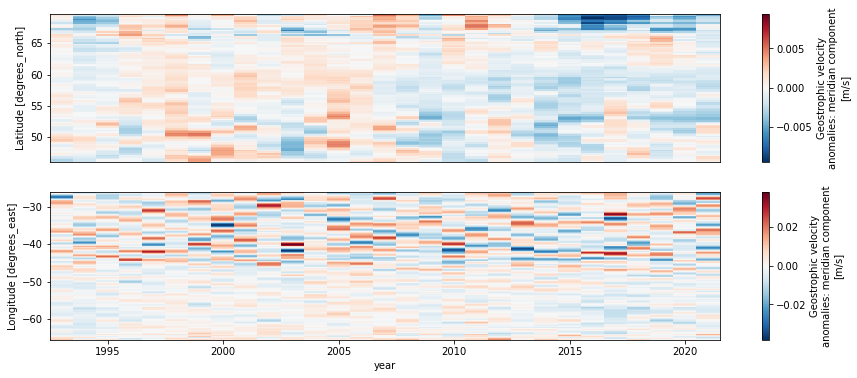

In [ ]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(15,6)
ds_uv_year.vgosa.mean(dim='longitude').T.plot(ax=axes[0]).axes.get_xaxis().set_visible(False)
ds_uv_year.vgosa.mean(dim='latitude').T.plot(ax=axes[1])

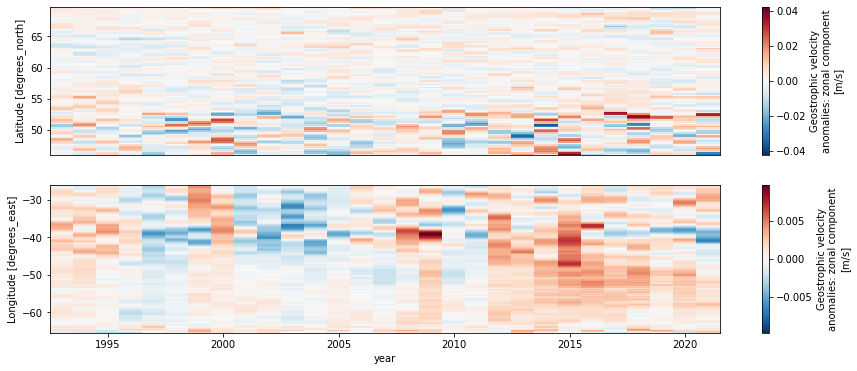

In [ ]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(15,6)
ds_uv_year.ugosa.mean(dim='longitude').T.plot(ax=axes[0]).axes.get_xaxis().set_visible(False)
ds_uv_year.ugosa.mean(dim='latitude').T.plot(ax=axes[1])

#### mapa

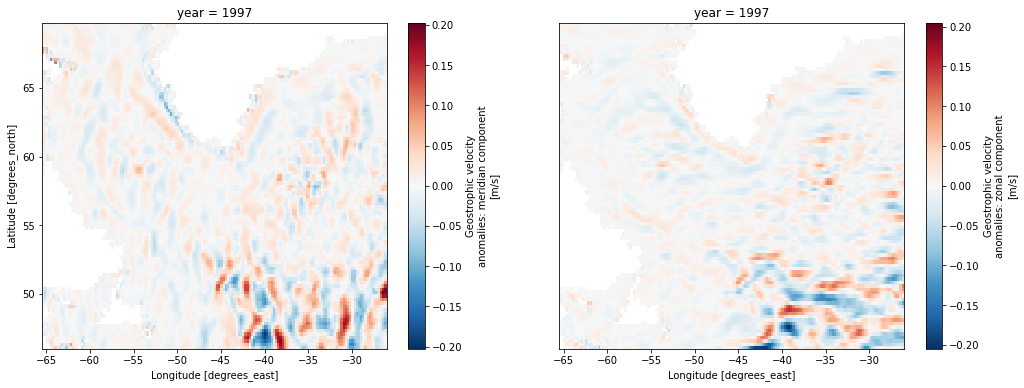

In [ ]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(17,6)
ds_uv_year.vgosa.sel(year=1997).plot(ax=axes[0])
ds_uv_year.ugosa.sel(year=1997).plot(ax=axes[1]).axes.get_yaxis().set_visible(False)

### Gráficas EKE

**Zonal y meridional**

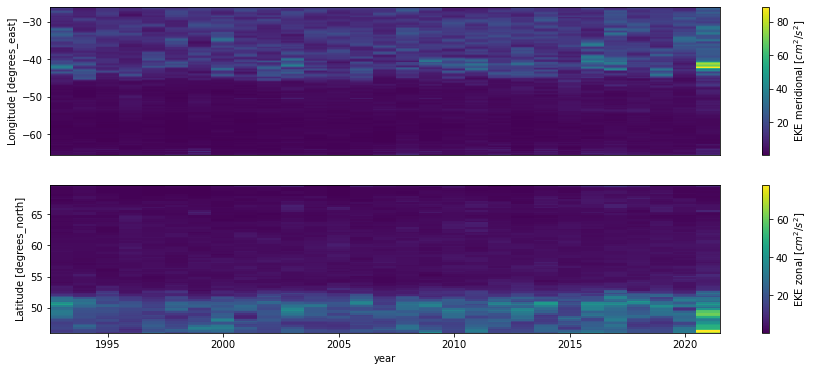

In [ ]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(15,6)
ds_uv_year.EKE_lon.T.plot(ax=axes[0]).axes.get_xaxis().set_visible(False)
ds_uv_year.EKE_lat.T.plot(ax=axes[1])

**mapa**



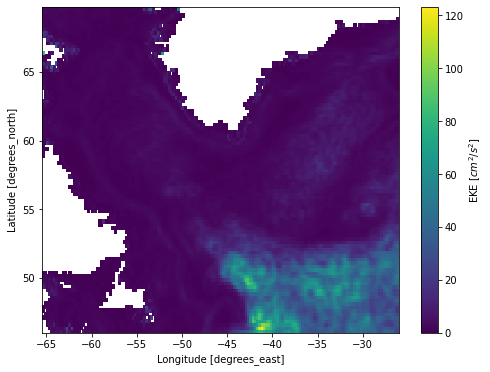

In [ ]:
fig, axes = plt.subplots(ncols=1)
fig.set_size_inches(8,6)
ds_uv_year.EKE.plot(ax=axes)

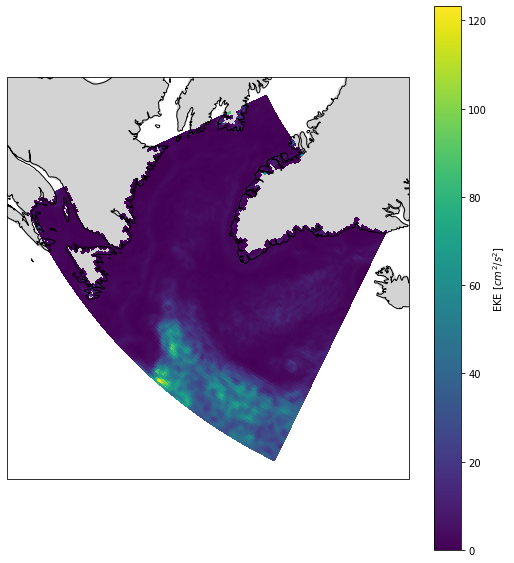

In [ ]:
plot_map(ds_uv_year.EKE)

**Serie de tiempo**

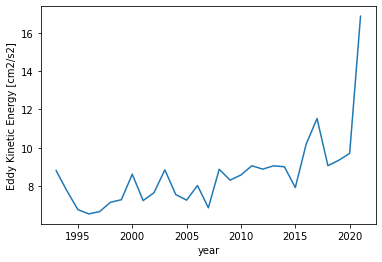

In [ ]:
ds_uv_year.EKE_t.plot()

### Gráficas $V_{EKE}$

**Zonal y meridional**

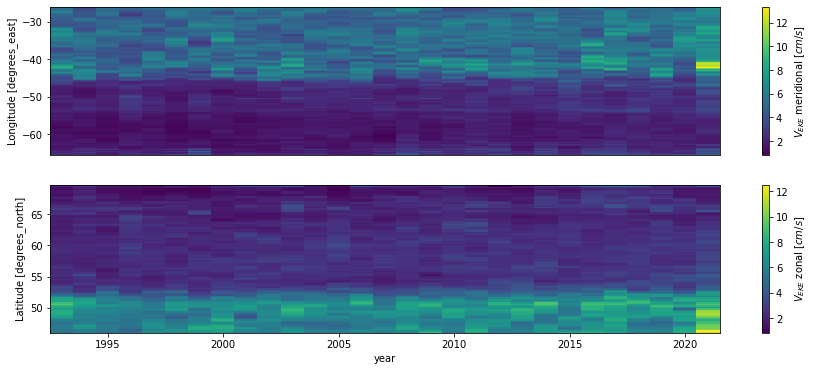

In [ ]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(15,6)
ds_uv_year.V_EKE_lon.T.plot(ax=axes[0]).axes.get_xaxis().set_visible(False)
ds_uv_year.V_EKE_lat.T.plot(ax=axes[1])

**mapa**

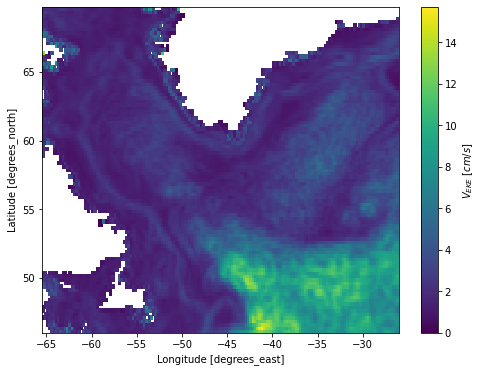

In [ ]:
fig, axes = plt.subplots(ncols=1)
fig.set_size_inches(8,6)
ds_uv_year.V_EKE.plot(ax=axes)

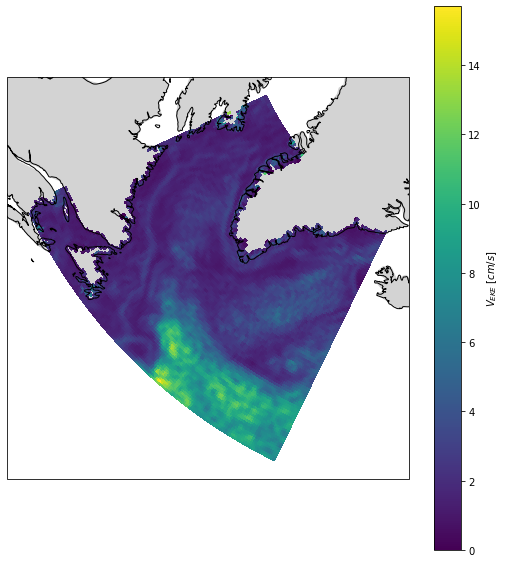

In [ ]:
plot_map(ds_uv_year.V_EKE)

**Serie de tiempo**

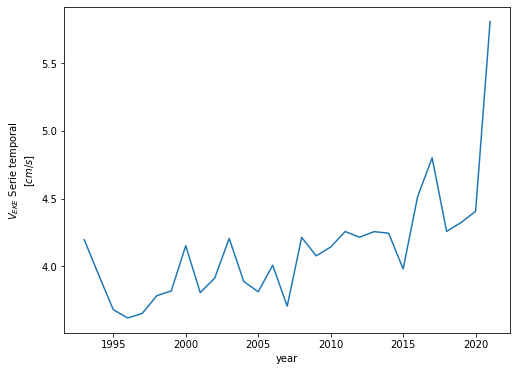

In [ ]:
fig, axes = plt.subplots(ncols=1)
fig.set_size_inches(8,6)
ds_uv_year.V_EKE_t.plot(ax=axes)

## Temperatura y Salinidad

### Descarga de Datos

Descargamos datos de temperatura y salinidad para la región de interes para el rango temporal de 1990 a 2020 de datos reprocesados in situ *Global Ocean- Gridded objective analysis fields of temperature and salinity using profiles from the reprocessed in-situ global product CORA*

In [ ]:
!python -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service INSITU_GLO_TS_OA_REP_OBSERVATIONS_013_002_b-TDS --product CORIOLIS-GLOBAL-CORA-OBS_FULL_TIME_SERIE --longitude-min -65.26933727897664 --longitude-max -26.09741046596361 --latitude-min 46.208600097865286 --latitude-max 69.69177050872769 --date-min "2015-01-01 00:00:00" --date-max "2020-12-15 23:59:59" --depth-min 1 --depth-max 2000 --variable TEMP --variable PSAL --out-dir "/content" --out-name "ds_TS_2015-2020.nc" --user "gcuervolondoo" --pwd "Primitivo3345#"
!python -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service INSITU_GLO_TS_OA_REP_OBSERVATIONS_013_002_b-TDS --product CORIOLIS-GLOBAL-CORA-OBS_FULL_TIME_SERIE --longitude-min -65.26933727897664 --longitude-max -26.09741046596361 --latitude-min 46.208600097865286 --latitude-max 69.69177050872769 --date-min "2010-01-01 00:00:00" --date-max "2014-12-31 00:00:00" --depth-min 1 --depth-max 2000 --variable TEMP --variable PSAL --out-dir "/content" --out-name "ds_TS_2010-2014.nc" --user "gcuervolondoo" --pwd "Primitivo3345#"
!python -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service INSITU_GLO_TS_OA_REP_OBSERVATIONS_013_002_b-TDS --product CORIOLIS-GLOBAL-CORA-OBS_FULL_TIME_SERIE --longitude-min -65.26933727897664 --longitude-max -26.09741046596361 --latitude-min 46.208600097865286 --latitude-max 69.69177050872769 --date-min "2005-01-01 00:00:00" --date-max "2009-12-31 00:00:00" --depth-min 1 --depth-max 2000 --variable TEMP --variable PSAL --out-dir "/content" --out-name "ds_TS_2005-2009.nc" --user "gcuervolondoo" --pwd "Primitivo3345#"
!python -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service INSITU_GLO_TS_OA_REP_OBSERVATIONS_013_002_b-TDS --product CORIOLIS-GLOBAL-CORA-OBS_FULL_TIME_SERIE --longitude-min -65.26933727897664 --longitude-max -26.09741046596361 --latitude-min 46.208600097865286 --latitude-max 69.69177050872769 --date-min "2000-01-01 00:00:00" --date-max "2004-12-31 00:00:00" --depth-min 1 --depth-max 2000 --variable TEMP --variable PSAL --out-dir "/content" --out-name "ds_TS_2000-2004.nc" --user "gcuervolondoo" --pwd "Primitivo3345#"
!python -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service INSITU_GLO_TS_OA_REP_OBSERVATIONS_013_002_b-TDS --product CORIOLIS-GLOBAL-CORA-OBS_FULL_TIME_SERIE --longitude-min -65.26933727897664 --longitude-max -26.09741046596361 --latitude-min 46.208600097865286 --latitude-max 69.69177050872769 --date-min "1995-01-01 00:00:00" --date-max "1999-12-31 00:00:00" --depth-min 1 --depth-max 2000 --variable TEMP --variable PSAL --out-dir "/content" --out-name "ds_TS_1995-1999.nc" --user "gcuervolondoo" --pwd "Primitivo3345#"
!python -m motuclient --motu https://my.cmems-du.eu/motu-web/Motu --service INSITU_GLO_TS_OA_REP_OBSERVATIONS_013_002_b-TDS --product CORIOLIS-GLOBAL-CORA-OBS_FULL_TIME_SERIE --longitude-min -65.26933727897664 --longitude-max -26.09741046596361 --latitude-min 46.208600097865286 --latitude-max 69.69177050872769 --date-min "1990-01-15 00:00:00" --date-max "1994-12-31 00:00:00" --depth-min 1 --depth-max 2000 --variable TEMP --variable PSAL --out-dir "/content" --out-name "ds_TS_1990-1994.nc" --user "gcuervolondoo" --pwd "Primitivo3345#"

2022-03-28 16:18:51.168 [ INFO] Asynchronous mode set
2022-03-28 16:18:51.170 [ INFO] Authenticating user gcuervolondoo for service https://my.cmems-du.eu/motu-web/Motu
2022-03-28 16:18:51.733 [ INFO] Requesting file to download (this can take a while)...
2022-03-28 16:18:57.066 [ INFO] Authenticating user gcuervolondoo for service https://my.cmems-du.eu/motu-web/Motu
2022-03-28 16:19:03.893 [ INFO] Product is not yet available (request in progress)
2022-03-28 16:19:13.904 [ INFO] Authenticating user gcuervolondoo for service https://my.cmems-du.eu/motu-web/Motu
2022-03-28 16:19:19.740 [ INFO] Product is not yet available (request in progress)
2022-03-28 16:19:29.751 [ INFO] Authenticating user gcuervolondoo for service https://my.cmems-du.eu/motu-web/Motu
2022-03-28 16:19:35.602 [ INFO] Product is not yet available (request in progress)
2022-03-28 16:19:45.612 [ INFO] Authenticating user gcuervolondoo for service https://my.cmems-du.eu/motu-web/Motu
2022-03-28 16:19:51.455 [ INFO] Pro

In [ ]:
ds_TS_1990_94 = xr.open_dataset("/content/ds_TS_1990-1994.nc").groupby('time.year').mean()
ds_TS_1995_99 = xr.open_dataset("/content/ds_TS_1995-1999.nc").groupby('time.year').mean()
ds_TS_2000_04 = xr.open_dataset("/content/ds_TS_2000-2004.nc").groupby('time.year').mean()
ds_TS_2005_09 = xr.open_dataset("/content/ds_TS_2005-2009.nc").groupby('time.year').mean()
ds_TS_2010_14 = xr.open_dataset("/content/ds_TS_2010-2014.nc").groupby('time.year').mean()
ds_TS_2015_20 = xr.open_dataset("/content/ds_TS_2015-2020.nc").groupby('time.year').mean()

In [ ]:
#extraemos los metadatos
dic_TS_attr = xr.open_dataset("/content/ds_TS_2015-2020.nc").attrs
dic_S_attr = xr.open_dataset("/content/ds_TS_2015-2020.nc").PSAL.attrs
dic_T_attr = xr.open_dataset("/content/ds_TS_2015-2020.nc").TEMP.attrs

In [ ]:
#unimos los data array
ds_TS_year = xr.combine_by_coords([ds_TS_1990_94, ds_TS_1995_99, ds_TS_2000_04, 
                                   ds_TS_2005_09, ds_TS_2010_14, ds_TS_2015_20, 
                                   ds_TS_2015_20])
#anadimos los metadatos
ds_TS_year = ds_TS_year.assign_attrs(dic_TS_attr)
ds_TS_year['TEMP'] = ds_TS_year.TEMP.assign_attrs(dic_T_attr)
ds_TS_year['PSAL'] = ds_TS_year.PSAL.assign_attrs(dic_S_attr)
#guardamos en google drive el dataset
pathdir = "/content/drive/MyDrive/ULPGC/Singulares/Poster/"
ds_TS_year.to_netcdf(pathdir+'ds_TS_year.nc')

### Calculo de CT y SA

In [ ]:
pathdir = "/content/drive/MyDrive/ULPGC/Singulares/Poster/"
ds_TS_year = xr.open_dataset(pathdir+"ds_TS_year.nc").sel(depth=slice(0, 5))
ds_TS_year

<xarray.Dataset>
Dimensions:    (depth: 3, latitude: 93, longitude: 79, year: 31)
Coordinates:
  * depth      (depth) float32 1.0 3.0 5.0
  * latitude   (latitude) float32 46.05 46.4 46.74 47.08 ... 69.36 69.57 69.77
  * longitude  (longitude) float32 -65.5 -65.0 -64.5 -64.0 ... -27.5 -27.0 -26.5
  * year       (year) int64 1990 1991 1992 1993 1994 ... 2017 2018 2019 2020
Data variables:
    TEMP       (year, depth, latitude, longitude) float64 ...
    PSAL       (year, depth, latitude, longitude) float64 ...
Attributes: (12/25)
    Conventions:            CF-1.4
    title:                  Global Ocean - Coriolis Observation Re-Analysis C...
    history:                20210709T012256L : Creation
    institution:            OceanScope
    project_name:           CMEMS Ins-TAC
    analysis_name:          OA_CORA5.2_
    ...                     ...
    comment:                V7.0 T and S fields
    History:                Translated to CF-1.0 Conventions by Netcdf-Java C...
    geospatial_lat_min:     46.05154800415039
    geospatial_lat_max:     69.77071380615234
    geospatial_lon_min:     -65.5
    geospatial_lon_max:     -26.5

In [ ]:
ds_TS_year.TEMP#PSAL

<xarray.DataArray 'TEMP' (year: 31, depth: 3, latitude: 93, longitude: 79)>
[683271 values with dtype=float64]
Coordinates:
  * depth      (depth) float32 1.0 3.0 5.0
  * latitude   (latitude) float32 46.05 46.4 46.74 47.08 ... 69.36 69.57 69.77
  * longitude  (longitude) float32 -65.5 -65.0 -64.5 -64.0 ... -27.5 -27.0 -26.5
  * year       (year) int64 1990 1991 1992 1993 1994 ... 2017 2018 2019 2020
Attributes:
    long_name:      sea_water_temperature
    standard_name:  sea_water_temperature
    units:          degree_Celsius
    _ChunkSizes:    [  1  51 182 240]

In [ ]:
#convertimos psu a g/kg
ds_TS_year['PSAL'] = ds_TS_year.PSAL*10e-3 #g/kg
ds_TS_year.PSAL.attrs['units'] = 'g/kg'
ds_TS_year.PSAL

<xarray.DataArray 'PSAL' (year: 31, depth: 3, latitude: 93, longitude: 79)>
array([[[[       nan,        nan, 0.29688583, ..., 0.35745583,
          0.35742583, 0.35738583],
         [       nan,        nan, 0.28884083, ..., 0.35708333,
          0.3570625 , 0.35704583],
         [       nan, 0.2925075 , 0.28791917, ..., 0.35671167,
          0.35670917, 0.35670667],
         ...,
         [0.31650667, 0.31612167, 0.31563167, ...,        nan,
                 nan,        nan],
         [0.31764   , 0.3170925 , 0.3166025 , ...,        nan,
                 nan,        nan],
         [0.31798333, 0.31756917, 0.3172075 , ...,        nan,
                 nan,        nan]],

        [[       nan,        nan,        nan, ..., 0.35754167,
          0.35751167, 0.3574775 ],
         [       nan,        nan, 0.293435  , ..., 0.35716917,
          0.35715167, 0.3571375 ],
         [       nan,        nan, 0.29245333, ..., 0.35679583,
          0.35679417, 0.35680583],
...
         [0.31723583, 0.31677083, 0.31626333, ...,        nan,
                 nan,        nan],
         [0.31848333, 0.31788083, 0.31728583, ...,        nan,
                 nan,        nan],
         [0.31900833, 0.318485  , 0.3179575 , ...,        nan,
                 nan,        nan]],

        [[       nan,        nan,        nan, ..., 0.3567425 ,
          0.35676583, 0.35680917],
         [       nan,        nan, 0.29341833, ..., 0.3563025 ,
          0.356335  , 0.35642583],
         [       nan,        nan, 0.2923375 , ..., 0.35588583,
          0.3559525 , 0.35606667],
         ...,
         [0.317935  , 0.31746833, 0.31694417, ...,        nan,
                 nan,        nan],
         [0.31920167, 0.31857667, 0.31796333, ...,        nan,
                 nan,        nan],
         [0.31975083, 0.31919333, 0.31864083, ...,        nan,
                 nan,        nan]]]])
Coordinates:
  * depth      (depth) float32 1.0 3.0 5.0
  * latitude   (latitude) float32 46.05 46.4 46.74 47.08 ... 69.36 69.57 69.77
  * longitude  (longitude) float32 -65.5 -65.0 -64.5 -64.0 ... -27.5 -27.0 -26.5
  * year       (year) int64 1990 1991 1992 1993 1994 ... 2017 2018 2019 2020
Attributes:
    units:    g/kg

In [ ]:
#Calculamos presion en dbar
ds_TS_year['P'] = gsw.conversions.p_from_z(ds_TS_year.depth, ds_TS_year.latitude)
ds_TS_year.P.attrs['long_name'] = 'Pressure'
ds_TS_year.P.attrs['standard_name'] = 'Pressure'
ds_TS_year.P.attrs['units'] = 'dbar'
ds_TS_year.P

<xarray.DataArray 'P' (depth: 3, latitude: 93)>
array([[-1.00827766, -1.00830983, -1.00834178, -1.0083735 , -1.00840499,
        -1.00843625, -1.00846728, -1.00849807, -1.00852862, -1.00855893,
        -1.00858898, -1.00861879, -1.00864834, -1.00867765, -1.00870669,
        -1.00873548, -1.008764  , -1.00879227, -1.00882027, -1.00884801,
        -1.00887548, -1.00890268, -1.00892962, -1.00895629, -1.00898269,
        -1.00900882, -1.00903468, -1.00906028, -1.0090856 , -1.00911065,
        -1.00913543, -1.00915994, -1.00918419, -1.00920816, -1.00923186,
        -1.0092553 , -1.00927847, -1.00930138, -1.00932401, -1.00934639,
        -1.00936849, -1.00939034, -1.00941193, -1.00943325, -1.00945432,
        -1.00947512, -1.00949567, -1.00951597, -1.00953601, -1.0095558 ,
        -1.00957534, -1.00959463, -1.00961368, -1.00963248, -1.00965103,
        -1.00966934, -1.00968742, -1.00970525, -1.00972285, -1.00974022,
        -1.00975735, -1.00977425, -1.00979093, -1.00980737, -1.0098236 ,
        -1.0098396 , -1.00985538, -1.00987094, -1.00988629, -1.00990142,
        -1.00991634, -1.00993105, -1.00994555, -1.00995985, -1.00997395,
        -1.00998795, -1.01000186, -1.01001569, -1.01002942, -1.01004305,
        -1.0100566 , -1.01007005, -1.0100834 , -1.01009666, -1.01010982,
        -1.01012288, -1.01013585, -1.01014872, -1.01016149, -1.01017416,
        -1.01018673, -1.0101992 , -1.01021157],
       [-3.02481818, -3.02491467, -3.02501051, -3.02510568, -3.02520016,
...
        -3.03054532, -3.03058273, -3.03061983],
       [-5.04133894, -5.04149977, -5.0416595 , -5.0418181 , -5.04197557,
        -5.04213188, -5.04228702, -5.04244097, -5.0425937 , -5.04274522,
        -5.0428955 , -5.04304454, -5.04319231, -5.04333881, -5.04348403,
        -5.04362796, -5.04377059, -5.04391191, -5.04405192, -5.0441906 ,
        -5.04432795, -5.04446398, -5.04459866, -5.04473201, -5.04486401,
        -5.04499466, -5.04512397, -5.04525192, -5.04537853, -5.04550379,
        -5.0456277 , -5.04575025, -5.04587147, -5.04599133, -5.04610986,
        -5.04622704, -5.04634289, -5.0464574 , -5.04657059, -5.04668245,
        -5.04679299, -5.04690222, -5.04701014, -5.04711676, -5.04722209,
        -5.04732612, -5.04742887, -5.04753035, -5.04763056, -5.04772951,
        -5.04782721, -5.04792366, -5.04801888, -5.04811287, -5.04820565,
        -5.04829721, -5.04838758, -5.04847675, -5.04856475, -5.04865157,
        -5.04873723, -5.04882174, -5.0489051 , -5.04898734, -5.04906845,
        -5.04914845, -5.04922735, -5.04930517, -5.0493819 , -5.04945756,
        -5.04953216, -5.04960571, -5.04967823, -5.04974972, -5.04982019,
        -5.04989021, -5.04995978, -5.05002889, -5.05009754, -5.05016572,
        -5.05023344, -5.05030068, -5.05036745, -5.05043374, -5.05049955,
        -5.05056487, -5.0506297 , -5.05069405, -5.05075789, -5.05082124,
        -5.05088409, -5.05094643, -5.05100827]])
Coordinates:
  * depth     (depth) float32 1.0 3.0 5.0
  * latitude  (latitude) float32 46.05 46.4 46.74 47.08 ... 69.36 69.57 69.77
Attributes:
    standard_name:           Pressure
    units:                   dbar
    positive:                down
    axis:                    Z
    _ChunkSizes:             152
    _CoordinateAxisType:     Height
    _CoordinateZisPositive:  down
    long_name:               Pressure

In [ ]:
#Calculamos la Salinidad Absoluta
ds_TS_year['SA'] = gsw.conversions.SA_from_SP(ds_TS_year.PSAL, ds_TS_year.P, 
                           ds_TS_year.PSAL.longitude, ds_TS_year.PSAL.latitude)
ds_TS_year.SA.attrs['long_name'] = 'Absolute_Salinity'
ds_TS_year.SA.attrs['standard_name'] = 'Absolute_Salinity'
ds_TS_year.SA

<xarray.DataArray 'SA' (year: 31, depth: 3, latitude: 93, longitude: 79)>
array([[[[       nan,        nan, 0.29829817, ..., 0.35914481,
          0.35911466, 0.35907447],
         [       nan,        nan, 0.29021495, ..., 0.35877062,
          0.35874968, 0.35873293],
         [       nan, 0.29389947, 0.28928894, ..., 0.35839727,
          0.35839475, 0.35839223],
         ...,
         [0.31800724, 0.31762066, 0.31712858, ...,        nan,
                 nan,        nan],
         [0.31914612, 0.31859628, 0.31810421, ...,        nan,
                 nan,        nan],
         [0.31949125, 0.31907538, 0.31871226, ...,        nan,
                 nan,        nan]],

        [[       nan,        nan,        nan, ..., 0.35923096,
          0.35920081, 0.35916647],
         [       nan,        nan, 0.29483104, ..., 0.35885677,
          0.35883918, 0.35882493],
         [       nan,        nan, 0.29384476, ..., 0.35848174,
          0.35848006, 0.35849177],
...
         [0.31873986, 0.31827291, 0.31776325, ...,        nan,
                 nan,        nan],
         [0.31999344, 0.31938835, 0.31879078, ...,        nan,
                 nan,        nan],
         [0.3205211 , 0.31999555, 0.31946582, ...,        nan,
                 nan,        nan]],

        [[       nan,        nan,        nan, ..., 0.35842792,
          0.35845136, 0.35849489],
         [       nan,        nan, 0.29481436, ..., 0.35798591,
          0.35801856, 0.35810981],
         [       nan,        nan, 0.29372844, ..., 0.35756734,
          0.35763432, 0.35774901],
         ...,
         [0.31944234, 0.31897372, 0.31844732, ...,        nan,
                 nan,        nan],
         [0.32071518, 0.32008748, 0.3194715 , ...,        nan,
                 nan,        nan],
         [0.32126711, 0.32070724, 0.3201524 , ...,        nan,
                 nan,        nan]]]])
Coordinates:
  * depth      (depth) float32 1.0 3.0 5.0
  * latitude   (latitude) float32 46.05 46.4 46.74 47.08 ... 69.36 69.57 69.77
  * longitude  (longitude) float32 -65.5 -65.0 -64.5 -64.0 ... -27.5 -27.0 -26.5
  * year       (year) int64 1990 1991 1992 1993 1994 ... 2017 2018 2019 2020
Attributes:
    units:          g/kg
    long_name:      Absolute_Salinity
    standard_name:  Absolute_Salinity

In [ ]:
ds_TS_year['CT'] = gsw.conversions.CT_from_t(ds_TS_year.SA, ds_TS_year.TEMP, ds_TS_year.P)
ds_TS_year.CT.attrs['long_name'] = 'Conservative_Temperature'
ds_TS_year.CT.attrs['standard_name'] = 'Conservative_Temperature'
ds_TS_year.CT.attrs['units'] = 'degree_Celsiusy'
ds_TS_year.CT

<xarray.DataArray 'CT' (year: 31, depth: 3, latitude: 93, longitude: 79)>
array([[[[        nan,         nan,  7.3717411 , ..., 16.34671124,
          16.35728496, 16.35055764],
         [        nan,         nan,  7.80373065, ..., 16.11061183,
          16.124157  , 16.12372047],
         [        nan,  7.18691979,  7.76929965, ..., 15.84627186,
          15.86453655, 15.87659646],
         ...,
         [ 1.48732498,  0.90556203,  0.31801065, ...,         nan,
                  nan,         nan],
         [ 1.62380309,  1.02828567,  0.44149191, ...,         nan,
                  nan,         nan],
         [ 1.49550309,  0.97488742,  0.45786205, ...,         nan,
                  nan,         nan]],

        [[        nan,         nan,         nan, ..., 16.30254919,
          16.31137555, 16.30150212],
         [        nan,         nan,  7.22002084, ..., 16.06967665,
          16.08199869, 16.08103776],
         [        nan,         nan,  7.13526192, ..., 15.81039842,
          15.82770224, 15.83853864],
...
         [ 1.31998892,  0.72855355,  0.12048982, ...,         nan,
                  nan,         nan],
         [ 1.47073302,  0.86123787,  0.25789984, ...,         nan,
                  nan,         nan],
         [ 1.37214428,  0.83114824,  0.29310899, ...,         nan,
                  nan,         nan]],

        [[        nan,         nan,         nan, ..., 16.0996242 ,
          16.10023537, 16.07637725],
         [        nan,         nan,  7.49234268, ..., 15.84978331,
          15.8533657 , 15.83177732],
         [        nan,         nan,  7.43082231, ..., 15.58104823,
          15.58331911, 15.564613  ],
         ...,
         [ 1.28879049,  0.70524868,  0.1053482 , ...,         nan,
                  nan,         nan],
         [ 1.43575938,  0.83503464,  0.24065026, ...,         nan,
                  nan,         nan],
         [ 1.33786982,  0.8038    ,  0.27445233, ...,         nan,
                  nan,         nan]]]])
Coordinates:
  * depth      (depth) float32 1.0 3.0 5.0
  * latitude   (latitude) float32 46.05 46.4 46.74 47.08 ... 69.36 69.57 69.77
  * longitude  (longitude) float32 -65.5 -65.0 -64.5 -64.0 ... -27.5 -27.0 -26.5
  * year       (year) int64 1990 1991 1992 1993 1994 ... 2017 2018 2019 2020
Attributes:
    units:          degree_Celsiusy
    long_name:      Conservative_Temperature
    standard_name:  Conservative_Temperature

In [ ]:
ds_TS_year['rho'] = gsw.rho(ds_TS_year.SA, ds_TS_year.CT, ds_TS_year.P)
ds_TS_year.rho.attrs['long_name'] = ' in-situ density '
ds_TS_year.rho.attrs['standard_name'] = 'rho'
ds_TS_year.rho.attrs['units'] = 'kg/m'
ds_TS_year.rho

<xarray.DataArray 'rho' (year: 31, depth: 3, latitude: 93, longitude: 79)>
array([[[[          nan,           nan, 1000.15366768, ...,
           999.41321035,  999.41175905,  999.41263715],
         [          nan,           nan, 1000.13006902, ...,
           999.44452814,  999.44271387,  999.44275904],
         [          nan, 1000.15686692, 1000.13079063, ...,
           999.47897175,  999.47659249,  999.47501902],
         ...,
         [1000.17023538, 1000.14494124, 1000.11444839, ...,
                    nan,           nan,           nan],
         [1000.17633158, 1000.151399  , 1000.12197592, ...,
                    nan,           nan,           nan],
         [1000.17175463, 1000.14934885, 1000.12334678, ...,
                    nan,           nan,           nan]],

        [[          nan,           nan,           nan, ...,
           999.40986833,  999.40865737,  999.4099599 ],
         [          nan,           nan, 1000.14662115, ...,
           999.44064541,  999.43900171,  999.439118  ],
         [          nan,           nan, 1000.14879429, ...,
           999.47431171,  999.47206521,  999.47066661],
...
         [1000.15395116, 1000.1267071 , 1000.09348357, ...,
                    nan,           nan,           nan],
         [1000.16102735, 1000.13407004, 1000.1021986 , ...,
                    nan,           nan,           nan],
         [1000.15752726, 1000.13312077, 1000.10472281, ...,
                    nan,           nan,           nan]],

        [[          nan,           nan,           nan, ...,
           999.4269821 ,  999.42691905,  999.43011069],
         [          nan,           nan, 1000.12672664, ...,
           999.45943517,  999.45899436,  999.46186943],
         [          nan,           nan, 1000.12821856, ...,
           999.4936921 ,  999.49345427,  999.49592271],
         ...,
         [1000.14304493, 1000.11589869, 1000.08290035, ...,
                    nan,           nan,           nan],
         [1000.15006169, 1000.12317264, 1000.09153159, ...,
                    nan,           nan,           nan],
         [1000.14655591, 1000.12216488, 1000.09399238, ...,
                    nan,           nan,           nan]]]])
Coordinates:
  * depth      (depth) float32 1.0 3.0 5.0
  * latitude   (latitude) float32 46.05 46.4 46.74 47.08 ... 69.36 69.57 69.77
  * longitude  (longitude) float32 -65.5 -65.0 -64.5 -64.0 ... -27.5 -27.0 -26.5
  * year       (year) int64 1990 1991 1992 1993 1994 ... 2017 2018 2019 2020
Attributes:
    units:          kg/m
    long_name:       in-situ density 
    standard_name:  rho

In [ ]:
ds_TS_WGC = ds_TS_year.sel(latitude=slice(56, 66), longitude=slice(-58, -45))
ds_TS_WGC

<xarray.Dataset>
Dimensions:    (depth: 3, latitude: 42, longitude: 27, year: 31)
Coordinates:
  * depth      (depth) float32 1.0 3.0 5.0
  * latitude   (latitude) float32 56.06 56.33 56.61 56.89 ... 65.5 65.7 65.91
  * longitude  (longitude) float32 -58.0 -57.5 -57.0 -56.5 ... -46.0 -45.5 -45.0
  * year       (year) int64 1990 1991 1992 1993 1994 ... 2017 2018 2019 2020
Data variables:
    TEMP       (year, depth, latitude, longitude) float64 ...
    PSAL       (year, depth, latitude, longitude) float64 0.3318 0.3337 ... nan
    P          (depth, latitude) float64 -1.009 -1.009 -1.009 ... -5.05 -5.05
    SA         (year, depth, latitude, longitude) float64 0.3334 0.3353 ... nan
    CT         (year, depth, latitude, longitude) float64 2.646 2.959 ... nan
    rho        (year, depth, latitude, longitude) float64 1e+03 1e+03 ... nan
Attributes: (12/25)
    Conventions:            CF-1.4
    title:                  Global Ocean - Coriolis Observation Re-Analysis C...
    history:                20210709T012256L : Creation
    institution:            OceanScope
    project_name:           CMEMS Ins-TAC
    analysis_name:          OA_CORA5.2_
    ...                     ...
    comment:                V7.0 T and S fields
    History:                Translated to CF-1.0 Conventions by Netcdf-Java C...
    geospatial_lat_min:     46.05154800415039
    geospatial_lat_max:     69.77071380615234
    geospatial_lon_min:     -65.5
    geospatial_lon_max:     -26.5

### Gráficas

#### Profundidad

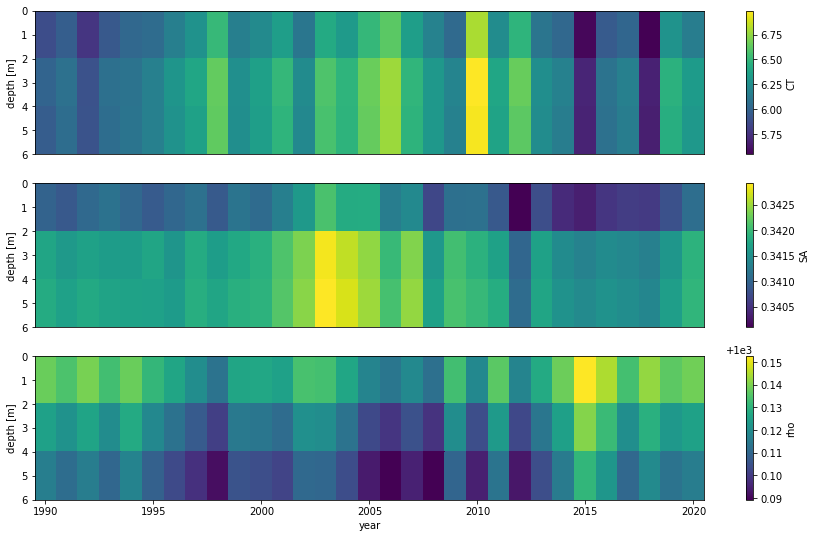

In [ ]:
fig, axes = plt.subplots(nrows=3)
fig.set_size_inches(15, 9)
ds_TS_year.CT.mean(dim=('latitude', 
                        'longitude')).T.plot(ax=axes[0]).axes.get_xaxis().set_visible(False)
axes[0].invert_yaxis()
ds_TS_year.SA.mean(dim=('latitude', 
                        'longitude')).T.plot(ax=axes[1]).axes.get_xaxis().set_visible(False)
axes[1].invert_yaxis()
ds_TS_year.rho.mean(dim=('latitude', 'longitude')).T.plot(ax=axes[2])
axes[2].invert_yaxis()

#### Zonal y meridional

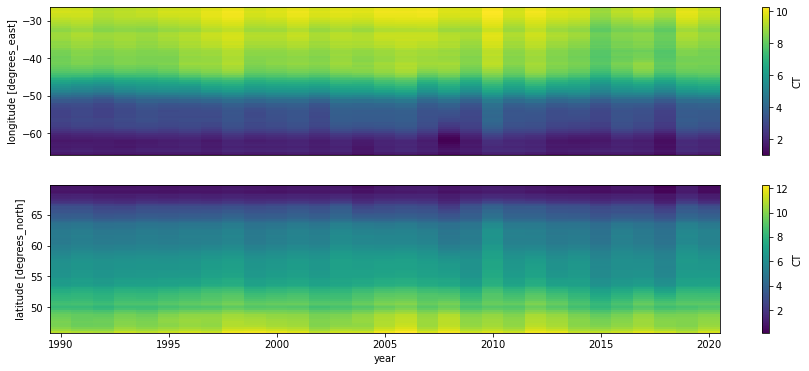

In [ ]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(15,6)
ds_TS_year.CT.mean(dim=('latitude', 
                        'depth')).T.plot(ax=axes[0]).axes.get_xaxis().set_visible(False)
ds_TS_year.CT.mean(dim=('longitude', 'depth')).T.plot(ax=axes[1])

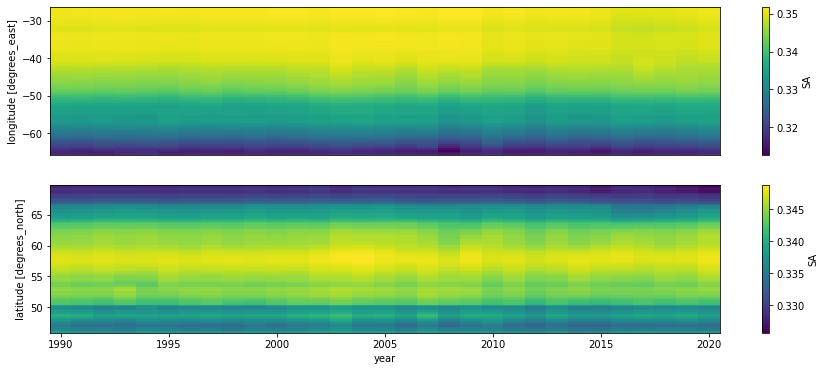

In [ ]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(15,6)
ds_TS_year.SA.mean(dim=('latitude', 
                        'depth')).T.plot(ax=axes[0]).axes.get_xaxis().set_visible(False)
ds_TS_year.SA.mean(dim=('longitude', 'depth')).T.plot(ax=axes[1])

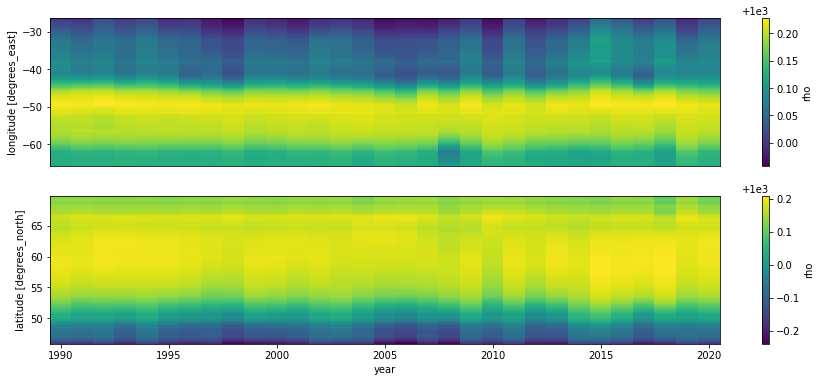

In [ ]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(15,6)
ds_TS_year.rho.mean(dim=('latitude', 
                        'depth')).T.plot(ax=axes[0]).axes.get_xaxis().set_visible(False)
ds_TS_year.rho.mean(dim=('longitude', 'depth')).T.plot(ax=axes[1])

#### mapa

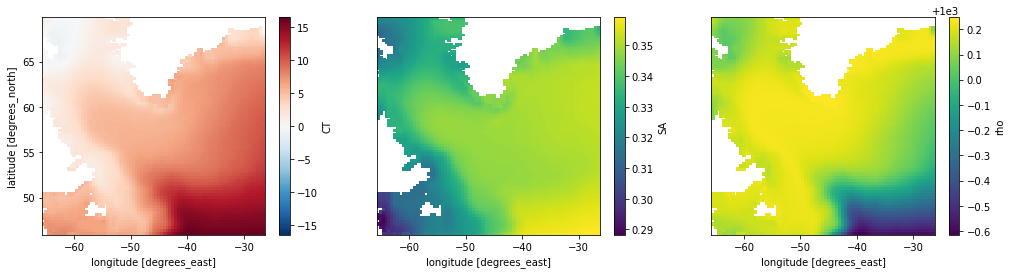

In [ ]:
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(17,4)
ds_TS_year.CT.mean(dim=('depth', 'year')).plot(ax=axes[0])
ds_TS_year.SA.mean(dim=('depth', 'year')).plot(ax=axes[1]).axes.get_yaxis().set_visible(False)
ds_TS_year.rho.mean(dim=('depth', 'year')).plot(ax=axes[2]).axes.get_yaxis().set_visible(False)

### CTD

#### Descarga de Datos

In [ ]:
!wget https://www.ncei.noaa.gov/access/world-ocean-database-select/OCLdb_output/ocldb1648558335.10958.CTD.tar.gz

--2022-04-03 22:31:41--  https://www.ncei.noaa.gov/access/world-ocean-database-select/OCLdb_output/ocldb1648558335.10958.CTD.tar.gz
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 205.167.25.172, 205.167.25.167, 205.167.25.171, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.172|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-04-03 22:31:42 ERROR 404: Not Found.



In [ ]:
!cp /content/drive/MyDrive/ULPGC/Singulares/Poster/ocldb1649025431.27856.CTD.tar.gz /content

In [ ]:
!tar -zxvf ocldb1649025431.27856.CTD.tar.gz

ocldb1649025431.27856.CTD.nc
wod_003235512O.nc
wod_003321703O.nc
wod_003235590O.nc
wod_003235614O.nc
wod_003235696O.nc
wod_003235697O.nc
wod_003235735O.nc
wod_003321753O.nc
wod_003235750O.nc
wod_003235766O.nc
wod_003235765O.nc
wod_003322008O.nc
wod_003236646O.nc
wod_003236648O.nc
wod_003236649O.nc
wod_003237783O.nc
wod_003237794O.nc
wod_003237804O.nc
wod_003324012O.nc
wod_003324014O.nc
wod_003324018O.nc
wod_003324022O.nc
wod_003324279O.nc
wod_003324281O.nc
wod_003324282O.nc
wod_003324422O.nc
wod_010414932O.nc
wod_003334176O.nc
wod_003334186O.nc
wod_000754925O.nc
wod_000754932O.nc
wod_003334219O.nc
wod_000754951O.nc
wod_000755080O.nc
wod_000755316O.nc
wod_000755321O.nc
wod_000757981O.nc
wod_000757987O.nc
wod_000758012O.nc
wod_003334804O.nc
wod_000758037O.nc
wod_000758049O.nc
wod_000758064O.nc
wod_000758076O.nc
wod_000758155O.nc
wod_000758161O.nc
wod_000758400O.nc
wod_000758412O.nc
wod_003334842O.nc
wod_000758427O.nc
wod_000758590O.nc
wod_000758600O.nc
wod_000758609O.nc
wod_000758626O.nc

### **Calculo de CT y SA Paralelo**

#### delayed y compute (Dask)
---
Muchas veces la ejecución en paralelo no es más rápida que la ejecución en serie, dado que aveces durante los procesos hay funciones que no liberal el GIL.

*Global Interpreter Lock* (GIL): Es el encargado de que sólo se haga una tarea a la vez para que no se sobrescriba la memoria, por lo que bloquea el la unidad de procesamiento mientras la esta usando un proceso.

Por lo que si las funciones que se quieren paralelizar **no liberan GIL** en el mejor de los casos el tiempo de ejecución en paralelo será igual al que tomaría la misma tarea en serie.

Sin embargo, muchas de las funciones contenidas en **Numpy** y **Pandas** son del tipo que liberan el GIL por lo que la mejor opción es comvertir los datos a un *numpy array* o a un *Data frame* para paralelizar desde *Dask*.


In [ ]:
!pip install dask[complete]  

     |████████████████████████████████| 136 kB 5.4 MB/s 
     |████████████████████████████████| 837 kB 49.5 MB/s 
     |████████████████████████████████| 830 kB 39.0 MB/s 
     |████████████████████████████████| 822 kB 39.6 MB/s 
     |████████████████████████████████| 802 kB 46.8 MB/s 
     |████████████████████████████████| 802 kB 48.4 MB/s 
     |████████████████████████████████| 793 kB 47.5 MB/s 
     |████████████████████████████████| 793 kB 52.6 MB/s 
     |████████████████████████████████| 791 kB 55.0 MB/s 
     |████████████████████████████████| 786 kB 56.9 MB/s 
     |████████████████████████████████| 779 kB 53.7 MB/s 
     |████████████████████████████████| 778 kB 48.0 MB/s 
     |████████████████████████████████| 776 kB 52.9 MB/s 
     |████████████████████████████████| 769 kB 48.1 MB/s 
     |████████████████████████████████| 766 kB 46.2 MB/s 
     |████████████████████████████████| 1.0 MB 43.6 MB/s 
     |████████████████████████████████| 722 kB 21.6 MB/s 
     |█████████

In [ ]:
#esto imprime el tiempo de ejecucion de cada celda
!pip install ipython-autotime
%load_ext autotime

In [ ]:
from dask.distributed import Client
from dask import delayed

client = Client(n_workers=4)
client

Client Scheduler: tcp://127.0.0.1:40823 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 13.62 GB


In [ ]:
from dask import compute, delayed, visualize

Una de las mejores formas de paralelizar es crear varias funciones que al final se recojan en una sola, dentro de esta **función global** se va a usa `dask.delayed` para crear un **grafo de procesos** que le permiten a dask programar o planificar las tareas para hacerlas en paralelo este grafo se puede ver con `dask.visualize`.

Es importante que sólo se llame **una sola vez** la función `dask.compute` que es la que acciona el computo del grafo en pralelo. Dado que varios compute impĺicarían varios grafos de planificación lo cual requiere mucho más tiempo de programación.

In [ ]:
file_names='wod_*.nc'
files_list = [f for f in glob.glob(file_names)]
print(f'Numero de CTD descargados: {len(files_list)}')

def format_time(numero):
  """
  definimos una funcion para pasar de 19990231 a 1999-02-31
  """
  strnum = str(numero)
  aaaa_mm_dd = strnum[:4]+'-'+strnum[4:6]+'-'+strnum[6:8] 
  return aaaa_mm_dd

def fix_coord(L_CTD):
  """
  cambiamos el formato de la fecha y lo volvemos una coordenada
  """
  date_format = [xr.apply_ufunc(format_time, f.date) for f in L_CTD]
  data_fixed = [f.assign_coords(year=date) for f, date in zip(L_CTD, date_format)]
  return data_fixed

def get_press(L_CTD):
  """
  Calculamos presion en dbar
  """
  data_press = []
  for CTD in L_CTD:
    CTD['z'] = CTD.z.astype(int)
    CTD['P'] = gsw.conversions.p_from_z(-CTD.z, CTD.z.lat)
    CTD['P'].attrs['long_name'] = 'Pressure'
    CTD['P'].attrs['standard_name'] = 'Pressure'
    CTD['P'].attrs['units'] = 'dbar'
    data_press.append(CTD)
  return data_press

def psu2gkg(L_CTD):
  """
  convertimos psu a g/kg
  """
  data_press_gkg = []
  for CTD in L_CTD: 
    if 'Salinity' in set(CTD.data_vars):
      CTD['Salinity'] = CTD.Salinity*10e-3 #g/kg
      CTD.Salinity.attrs['units'] = 'g/kg'
      data_press_gkg.append(CTD)
  return data_press_gkg

def get_SA(L_CTD):
  """
  Calculamos la Salinidad Absoluta
  """
  data_SA = []
  for CTD in L_CTD: 
    if 'Salinity' in set(CTD.data_vars):
      CTD['SA'] = gsw.conversions.SA_from_SP(CTD.Salinity, 
                                             CTD.P, 
                                             CTD.Salinity.lon, 
                                             CTD.Salinity.lat)
      CTD['SA'].attrs['long_name'] = 'Absolute_Salinity'
      CTD['SA'].attrs['standard_name'] = 'Absolute_Salinity'
      data_SA.append(CTD)
  return data_SA
  
def get_CT(L_CTD):
  """
  Calculamos la temperatura conservativa
  """
  data_CT = []
  for CTD in L_CTD: 
    if 'Salinity' in set(CTD.data_vars):
      CTD['CT'] = gsw.conversions.CT_from_t(CTD.SA,
                                            CTD.Temperature,
                                            CTD.P)
      CTD.CT.attrs['long_name'] = 'Conservative_Temperature'
      CTD.CT.attrs['standard_name'] = 'Conservative_Temperature'
      CTD.CT.attrs['units'] = 'degree_Celsiusy'
      data_CT.append(CTD)
  return data_CT

def get_rho(L_CTD):
  """
  Calculamos la densidad
  """
  data_rho = []
  for CTD in L_CTD: 
    if 'Salinity' in set(CTD.data_vars):
      CTD['rho'] = gsw.rho(CTD.SA,
                           CTD.CT,
                           CTD.P)
      CTD.rho.attrs['long_name'] = ' in-situ density '
      CTD.rho.attrs['standard_name'] = 'rho'
      CTD.rho.attrs['units'] = 'kg/m'
      data_rho.append(CTD)
  return data_rho

def process(files):
  L_CTD = [delayed(xr.open_dataset)(f) for f in files]
  data_processed = delayed(fix_coord)(L_CTD)
  data_processed = delayed(get_press)(data_processed)
  data_processed = delayed(psu2gkg)(data_processed)
  data_processed = delayed(get_SA)(data_processed)
  data_processed = delayed(get_CT)(data_processed)
  data_processed = delayed(get_rho)(data_processed)
  return data_processed

Numero de CTD descargados: 3947


In [ ]:
delay_precess = process(files_list) 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0457825 to fit


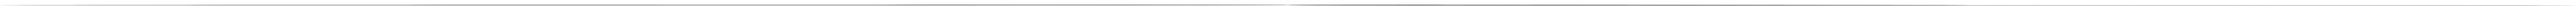

In [ ]:
delay_precess#.visualize()

Es muy importante la elección del **planificador** o atributo `scheduler` dado que esto **determina la velocidad** del computo paralelo, hay varias opciones por lo que se debe probar una a una para ver cual da el menor tiempo de ejecución.

`scheduler = 'threading', 'processes', 'sync' `

**sync:** Es igual a hacer el proceso en serie, esto es para tener siempre la opción de serializar nuestro implementación en paralelo.

**threading:** Se usa sólo si las funciones a paralelizar son de Numpy o Pandas dado que estas liberan el GIL.

**processes:** Se usa cuando las funciones a paralelizar no son de Numpy ni de Pandas.

In [ ]:
L_CTD = compute(delay_precess, scheduler='threading')[0]

/usr/local/lib/python3.7/dist-packages/xarray/core/computation.py:739: RuntimeWarning: invalid value encountered in ct_from_t
  result_data = func(*input_data)
/usr/local/lib/python3.7/dist-packages/xarray/core/computation.py:739: RuntimeWarning: invalid value encountered in ct_from_t
  result_data = func(*input_data)
/usr/local/lib/python3.7/dist-packages/xarray/core/computation.py:739: RuntimeWarning: invalid value encountered in ct_from_t
  result_data = func(*input_data)
/usr/local/lib/python3.7/dist-packages/xarray/core/computation.py:739: RuntimeWarning: overflow encountered in ct_from_t
  result_data = func(*input_data)
/usr/local/lib/python3.7/dist-packages/xarray/core/computation.py:739: RuntimeWarning: invalid value encountered in ct_from_t
  result_data = func(*input_data)
/usr/local/lib/python3.7/dist-packages/xarray/core/computation.py:739: RuntimeWarning: invalid value encountered in ct_from_t
  result_data = func(*input_data)
/usr/local/lib/python3.7/dist-packages/xarray

#### **mfdataset**
---

En el caso de la función de xarray para hacer tareas en parelelo, se identifica que si los dataset no tiene las mismas dimensiones y tamaños no es posible aplicar esta herramienta.

Los xarray tienen sentido sólo si comparten las mismas dimensiones por lo que no hay un buen soporte para jagged o ragged arrays.

In [ ]:
#esto imprime el tiempo de ejecucion de cada celda
!pip install ipython-autotime
%load_ext autotime

In [ ]:
file_names='wod_*.nc'
files_list = [f for f in glob.glob(file_names)]

In [ ]:
ds = xr.open_dataset(files_list[5])
ds['z']=ds['z'].values

Unos de los argumentos más importantes es el de `preprocess` dado que nos permite modificar los array antes de cargarlos como uno sólo con mfdataset. Dado que diferencias entre los dataset llevan a problemas de compatibilidad.

Ademas, que las cordenadas no sean monotonicas significan que los dataset tiene es cordenada pero en ordenes diferentes por lo que no mejor es eliminar esa dimensión y crear otra para concatenar ej. el tiempo.

GitHub links:

https://github.com/pydata/xarray/pull/2678#discussion_r248639771

https://github.com/pydata/xarray/issues/2662#issuecomment-454423937

In [ ]:
def set_dim_time(ds):
  ds=ds[['Temperature','Salinity']]
  ds = ds.expand_dims('time')
  ds = ds.assign(z=ds.z)
  ds = ds.drop_dims('z')
  return ds
xr.open_mfdataset(files_list[:3] , chunks= (1000), parallel=True,
                  #preprocess= set_dim_time,
                  compat='override', 
                  coords='minimal',
                  #data_vars=['Temperature']
                  )#.Temperature

<xarray.Dataset>
Dimensions:                        (z: 4719)
Coordinates:
  * z                              (z) float64 0.0 2.0 ... 3.03e+03 3.031e+03
    lat                            float32 ...
    lon                            float32 ...
    time                           datetime64[ns] ...
Data variables: (12/47)
    country                        |S200 ...
    WOD_cruise_identifier          |S200 ...
    originators_cruise_identifier  |S200 ...
    wod_unique_cast                int32 ...
    date                           int32 ...
    GMT_time                       float32 ...
    ...                             ...
    WODfd                          int16 ...
    Oflag                          int32 ...
    Oxygen_Original_units          |S200 ...
    Cast_Direction                 |S200 ...
    Recorder                       |S200 ...
    real_time                      |S200 ...
Attributes: (12/37)
    flag_definitions:              WODfd
    institution:                   National Oceanographic Data Center(NODC), ...
    source:                        World Ocean Database
    references:                    World Ocean Database 2013. URL:http://data...
    title:                         World Ocean Database - Unique Cast 013742213
    summary:                       Data for single cast from the World Ocean ...
    ...                            ...
    history:                       
    license:                       
    standard_name_vocabulary:      CF-1.6
    featureType:                   Profile
    cdm_data_type:                 Profile
    Conventions:                   CF-1.6

#### dataframe (Dask)
---

In [ ]:
!pip install dask[complete]  

     |████████████████████████████████| 136 kB 22.1 MB/s 
     |████████████████████████████████| 837 kB 33.3 MB/s 
     |████████████████████████████████| 830 kB 52.2 MB/s 
     |████████████████████████████████| 822 kB 55.6 MB/s 
     |████████████████████████████████| 802 kB 56.1 MB/s 
     |████████████████████████████████| 802 kB 39.5 MB/s 
     |████████████████████████████████| 793 kB 53.2 MB/s 
     |████████████████████████████████| 793 kB 37.3 MB/s 
     |████████████████████████████████| 791 kB 53.5 MB/s 
     |████████████████████████████████| 786 kB 50.7 MB/s 
     |████████████████████████████████| 779 kB 43.4 MB/s 
     |████████████████████████████████| 778 kB 52.2 MB/s 
     |████████████████████████████████| 776 kB 34.2 MB/s 
     |████████████████████████████████| 769 kB 32.9 MB/s 
     |████████████████████████████████| 766 kB 46.3 MB/s 
     |████████████████████████████████| 1.0 MB 52.5 MB/s 
     |████████████████████████████████| 722 kB 43.6 MB/s 
     |████████

In [28]:
#esto imprime el tiempo de ejecucion de cada celda
!pip install ipython-autotime
%load_ext autotime

time: 217 µs (started: 2022-04-05 00:11:06 +00:00)


In [43]:
!pip install d6tstack

time: 8.1 s (started: 2022-04-05 00:40:41 +00:00)


In [44]:
from dask.distributed import Client
from dask import delayed
import d6tstack.combine_csv

client = Client(n_workers=4)
client

/usr/local/lib/python3.7/dist-packages/distributed/node.py:155: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39201 instead
  http_address["port"], self.http_server.port


Client Scheduler: tcp://127.0.0.1:37719 Dashboard: http://127.0.0.1:39201/status,Cluster Workers: 4 Cores: 4 Memory: 13.62 GB


time: 4.02 s (started: 2022-04-05 00:41:16 +00:00)


In [4]:
import dask.dataframe as dd

En este caso se generaron los `.csv` a partir de los `.nc` dado que, la herramienta de xarray que convirte dataset a dataframe genera mejores dataframes que los que se obtienen de la misma base de datos.

In [31]:
#convierte .nc a .csv
file_names='wod_*.nc'
files_list = [file for file in glob.glob(file_names)]
print(f'Numero de CTD descargados: {len(files_list)}')
#implementacion en serie
for f in files_list:
  df = xr.open_dataset(f).to_dataframe()
  df.to_csv(f'{f[:-3]}.csv')

time: 8min 59s (started: 2022-04-05 00:11:40 +00:00)


In [32]:
#implementación en paralelo
def nc2csv(f):
  df = xr.open_dataset(f).to_dataframe()
  df.to_csv(f'{f[:-3]}.csv')
#Creamos una lista de funciones delayed
delay_process = [delayed(nc2csv)(f) for f in files_list]
#visualize(*delay_process)

time: 425 ms (started: 2022-04-05 00:20:40 +00:00)


In [33]:
#el * es muy importante, es lo que permite calcular todas los elemetos de las lista al tiempo
compute(*delay_process, scheduler='processes');

time: 6min 16s (started: 2022-04-05 00:20:41 +00:00)


Es importante que antes de cargar los dataframe como un `dask.dataframe` nos cercioremos de que tengan las mimas columnas.

https://github.com/d6t/d6tstack/blob/master/examples-dask.ipynb

In [45]:
#checkea si todos los df tiene las mismas columnas
cfg_fnames = list(glob.glob('wod_*.csv'))
c = d6tstack.combine_csv.CombinerCSV(cfg_fnames)
# check columns
print('all equal',c.is_all_equal())
print('')
c.is_column_present()

sniffing columns ok
all equal False



,z,country,WOD_cruise_identifier,originators_cruise_identifier,wod_unique_cast,lat,lon,time,date,GMT_time,...,Barometric_Pres,Cloud_Cover,Dry_Bulb_Temp,Pressure_uncalibrated,Wave_Height,Wave_Period,Weather_Condition,Wet_Bulb_Temp,Wind_Direction,Wind_Speed
file_path,,,,,,,,,,,,,,,,,,,,,
wod_000754925O.csv,True,True,True,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
wod_000754932O.csv,True,True,True,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
wod_000754951O.csv,True,True,True,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
wod_000755080O.csv,True,True,True,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
wod_000755316O.csv,True,True,True,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wod_020290969O.csv,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
wod_020291068O.csv,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
wod_020291070O.csv,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


time: 51.3 s (started: 2022-04-05 00:43:51 +00:00)


In [46]:
# Esto hace que todos los df tengan la misma cantidad de columnas rellenando con nan
fnames = d6tstack.combine_csv.CombinerCSV(cfg_fnames).to_csv_align(output_dir='/content')

sniffing columns ok
writing /content/d6tstack-wod_000754925O.csv ok
writing /content/d6tstack-wod_000754932O.csv ok
writing /content/d6tstack-wod_000754951O.csv ok
writing /content/d6tstack-wod_000755080O.csv ok
writing /content/d6tstack-wod_000755316O.csv ok
writing /content/d6tstack-wod_000755321O.csv ok
writing /content/d6tstack-wod_000757981O.csv ok
writing /content/d6tstack-wod_000757987O.csv ok
writing /content/d6tstack-wod_000758012O.csv ok
writing /content/d6tstack-wod_000758037O.csv ok
writing /content/d6tstack-wod_000758049O.csv ok
writing /content/d6tstack-wod_000758064O.csv ok
writing /content/d6tstack-wod_000758076O.csv ok
writing /content/d6tstack-wod_000758155O.csv ok
writing /content/d6tstack-wod_000758161O.csv ok
writing /content/d6tstack-wod_000758400O.csv ok
writing /content/d6tstack-wod_000758412O.csv ok
writing /content/d6tstack-wod_000758427O.csv ok
writing /content/d6tstack-wod_000758590O.csv ok
writing /content/d6tstack-wod_000758600O.csv ok
writing /content/d6t

In [5]:
# dask trata de inferir el type de cada columna 
cols_type = {'Institute': str, 'Oxygen_Instrument': str,
             'Project': str, 'Transmissiv_Instrument': str,
             'dbase_orig': str, 'origflagset': str,
             'Oxygen_Original_units': str, 'Temperature_Scale': str,
             'originators_cruise_identifier': str,
             'Orig_Stat_Num': float, 'Pressure_sigfigs': float,
             'Chlorophyll_Instrument': str,
             'Salinity_WODflag': float, 'Salinity_WODprofileflag': float,
             'Salinity_sigfigs': float, 'real_time': str, 
             'originators_station_identifier': str,
             'Cast_Direction': str, 'Recorder': str,
             'Cast_Duration': str, 'Pressure_Instrument': str,
             'Cloud_Cover': str, 'Wave_Height': str,
             'Wave_Period': str, 'Weather_Condition': str,
             'Wind_Direction': str}
#pero cuando falla hay que definirlo manualmente
ddf = dd.read_csv('d6tstack-wod_*.csv',
                  dtype=cols_type)
ddf.head()

,z,country,WOD_cruise_identifier,originators_cruise_identifier,wod_unique_cast,lat,lon,time,date,GMT_time,...,Dry_Bulb_Temp,Pressure_uncalibrated,Wave_Height,Wave_Period,Weather_Condition,Wet_Bulb_Temp,Wind_Direction,Wind_Speed,filepath,filename
0,4.953548,b'CANADA',b'CA008057',NaN,754925,58.141,-57.011,1977-10-21 02:50:59.999870976,19771021,2.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wod_000754925O.csv,wod_000754925O.csv
1,6.736796,b'CANADA',b'CA008057',NaN,754925,58.141,-57.011,1977-10-21 02:50:59.999870976,19771021,2.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wod_000754925O.csv,wod_000754925O.csv
2,9.015368,b'CANADA',b'CA008057',NaN,754925,58.141,-57.011,1977-10-21 02:50:59.999870976,19771021,2.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wod_000754925O.csv,wod_000754925O.csv
3,10.897647,b'CANADA',b'CA008057',NaN,754925,58.141,-57.011,1977-10-21 02:50:59.999870976,19771021,2.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wod_000754925O.csv,wod_000754925O.csv
4,12.779908,b'CANADA',b'CA008057',NaN,754925,58.141,-57.011,1977-10-21 02:50:59.999870976,19771021,2.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wod_000754925O.csv,wod_000754925O.csv


In [52]:
ddf.columns

Index(['z', 'country', 'WOD_cruise_identifier',
       'originators_cruise_identifier', 'wod_unique_cast', 'lat', 'lon',
       'time', 'date', 'GMT_time', 'Access_no', 'Platform', 'Orig_Stat_Num',
       'Bottom_Depth', 'dataset', 'z_WODflag', 'z_sigfig', 'Temperature',
       'Temperature_sigfigs', 'Salinity', 'Temperature_WODflag',
       'Salinity_sigfigs', 'Salinity_WODflag', 'Temperature_WODprofileflag',
       'Salinity_WODprofileflag', 'crs', 'WODf', 'WODfp', 'WODfd', 'Pressure',
       'Pressure_sigfigs', 'dbase_orig', 'Temperature_Instrument', 'Oxygen',
       'Oxygen_WODflag', 'Oxygen_WODprofileflag', 'Oxygen_sigfigs',
       'Salinity_Instrument', 'Cast_Tow_number', 'Oxygen_Instrument', 'Oflag',
       'Salinity_origflag', 'Temperature_origflag', 'origflagset',
       'z_origflag', 'Oxygen_origflag', 'Salinity_Scale', 'High_res_pair',
       'Institute', 'Temperature_Scale', 'Project', 'Oxygen_Original_units',
       'real_time', 'Cast_Direction', 'Recorder', 'Chlorophyll',

time: 16.1 ms (started: 2022-04-05 01:09:32 +00:00)


Una de las ventajas de convertir todos los `.nc` en una `dask.dataframe` es que podemos aplicar muchas funciones de Pandas, como la función `describe()` que nos permite ver que hay datos extremos que hay que eliminar.

In [6]:
df_descr = ddf.describe().compute()
df_descr.T

/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


,count,mean,std,min,25%,50%,75%,max
z,7696766.0,1.598949e+03,9.917335e+02,0.000000e+00,1.086500e+03,1.897255e+03,3.497180e+03,6.277355e+03
wod_unique_cast,7696766.0,1.138200e+07,5.022324e+06,7.549250e+05,1.000807e+07,1.374194e+07,2.056236e+07,2.056236e+07
lat,7696766.0,5.507774e+01,4.919482e+00,4.621350e+01,5.249980e+01,5.800003e+01,6.491550e+01,6.491550e+01
lon,7696766.0,-4.230711e+01,8.535021e+00,-5.972400e+01,-4.851667e+01,-3.750270e+01,-2.610000e+01,-2.610000e+01
date,7696766.0,2.001048e+07,9.807446e+04,1.972072e+07,1.997082e+07,2.007050e+07,2.020113e+07,2.020113e+07
GMT_time,7680535.0,1.189969e+01,7.071896e+00,0.000000e+00,7.666666e+00,1.603333e+01,2.398333e+01,2.398333e+01
Access_no,7696766.0,1.004642e+06,2.891724e+06,1.270000e+02,2.023000e+03,3.858900e+04,9.900204e+06,9.900204e+06
Orig_Stat_Num,6381124.0,2.003480e+06,5.335222e+06,1.000000e+00,7.600000e+01,4.610000e+02,4.079722e+07,4.079722e+07
Bottom_Depth,6325095.0,3.255507e+03,1.425691e+03,2.660000e+02,2.927000e+03,3.465000e+03,3.276600e+04,3.276600e+04
z_WODflag,7696766.0,9.992379e-03,1.410134e-01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00


#### Calculo de CT y SA Serie

In [ ]:
#esto imprime el tiempo de ejecucion de cada celda
!pip install ipython-autotime
%load_ext autotime

In [ ]:
file_names='wod_*.nc'
files_list = [file for file in glob.glob(file_names)]
list_ds_CTD = [xr.open_dataset(f) for f in files_list]
print(f'Numero de CTD descargados: {len(files_list)}')

Numero de CTD descargados: 3947


In [ ]:
#definimos una funcion para pasar de 19990231 a 1999-02-31
def format_time(numero):
  strnum = str(numero)
  return strnum[:4]+'-'+strnum[4:6]+'-'+strnum[6:8]
#cambiamos el formato de la fecha y lo volvemos una coordenada
for i in range(len(files_list)):
  format_date_arr = xr.apply_ufunc(format_time,list_ds_CTD[i].date)
  list_ds_CTD[i] = list_ds_CTD[i].assign_coords(year=format_date_arr)
#volvemos la profundidad se float a int
for i in range(len(list_ds_CTD)):
  list_ds_CTD[i]['z'] = list_ds_CTD[i].z.astype(int)

In [ ]:
#Calculamos presion en dbar
for i in range(len(list_ds_CTD)):
  list_ds_CTD[i]['P'] = gsw.conversions.p_from_z(-list_ds_CTD[i].z, 
                                                 list_ds_CTD[i].z.lat)
  list_ds_CTD[i]['P'].attrs['long_name'] = 'Pressure'
  list_ds_CTD[i]['P'].attrs['standard_name'] = 'Pressure'
  list_ds_CTD[i]['P'].attrs['units'] = 'dbar'

In [ ]:
#convertimos psu a g/kg
for i in range(len(list_ds_CTD)): 
  if 'Salinity' in set(list_ds_CTD[i].data_vars):
    list_ds_CTD[i]['Salinity'] = list_ds_CTD[i].Salinity*10e-3 #g/kg
    list_ds_CTD[i].Salinity.attrs['units'] = 'g/kg'

In [ ]:
#Calculamos la Salinidad Absoluta
for i in range(len(list_ds_CTD)): 
  if 'Salinity' in set(list_ds_CTD[i].data_vars):
    list_ds_CTD[i]['SA'] = gsw.conversions.SA_from_SP(list_ds_CTD[i].Salinity, list_ds_CTD[i].P, 
                               list_ds_CTD[i].Salinity.lon, list_ds_CTD[i].Salinity.lat)
    list_ds_CTD[i]['SA'].attrs['long_name'] = 'Absolute_Salinity'
    list_ds_CTD[i]['SA'].attrs['standard_name'] = 'Absolute_Salinity'

In [ ]:
#Calculamos la temperatura conservativa
for i in range(len(list_ds_CTD)): 
  if 'Salinity' in set(list_ds_CTD[i].data_vars):
    list_ds_CTD[i]['CT'] = gsw.conversions.CT_from_t(list_ds_CTD[i].SA, 
                                                     list_ds_CTD[i].Temperature, 
                                                     list_ds_CTD[i].P)
    list_ds_CTD[i].CT.attrs['long_name'] = 'Conservative_Temperature'
    list_ds_CTD[i].CT.attrs['standard_name'] = 'Conservative_Temperature'
    list_ds_CTD[i].CT.attrs['units'] = 'degree_Celsiusy'

In [ ]:
#Calculamos la densidad
for i in range(len(list_ds_CTD)): 
  if 'Salinity' in set(list_ds_CTD[i].data_vars):
    list_ds_CTD[i]['rho'] = gsw.rho(list_ds_CTD[i].SA, 
                                    list_ds_CTD[i].CT, 
                                    list_ds_CTD[i].P)
    list_ds_CTD[i].rho.attrs['long_name'] = ' in-situ density '
    list_ds_CTD[i].rho.attrs['standard_name'] = 'rho'
    list_ds_CTD[i].rho.attrs['units'] = 'kg/m'

#### Gráficas

In [ ]:
list_years_CTD = [int(list_ds_CTD[i].year.values.tolist().split("-")[0]) for i in range(len(list_ds_CTD))]

In [ ]:
print(f'Numero de CTD: {len(list_years_CTD)}')

Numero de CTD: 3947


In [ ]:
import plotly.express as px
px.histogram(x=list_years_CTD, text_auto=True, nbins=51)

In [ ]:
M_CT_ragg = np.array([list_ds_CTD[i].CT.values for i in range(len(list_ds_CTD)) if 'Salinity' in set(list_ds_CTD[i].data_vars)])
M_SA_ragg = np.array([list_ds_CTD[i].SA.values for i in range(len(list_ds_CTD)) if 'Salinity' in set(list_ds_CTD[i].data_vars)])
M_P_ragg = np.array([list_ds_CTD[i].P.values for i in range(len(list_ds_CTD)) if 'Salinity' in set(list_ds_CTD[i].data_vars)])

In [ ]:
max_P = max([max(M_P_ragg[i]) for i in range(M_P_ragg.shape[0])])
min_P = min([min(M_P_ragg[i]) for i in range(M_P_ragg.shape[0])])

In [ ]:
#Eliminamos los valores de salinidad que se salen de lo normal
for i in range(M_CT_ragg.shape[0]):
  M_CT_ragg[i] = np.array([T for T in M_CT_ragg[i] if 0<T<20])
for i in range(M_SA_ragg.shape[0]):
  M_SA_ragg[i] = np.array([SA for SA in M_SA_ragg[i] if 0.33<SA<0.362])

In [ ]:
#get max row in ragged matirx
max_len_CT = np.max([M_CT_ragg[i].shape[0] for i in range(M_CT_ragg.shape[0])])
max_len_SA = np.max([M_SA_ragg[i].shape[0] for i in range(M_SA_ragg.shape[0])])
#elige el mayor
max_len = np.max([max_len_CT, max_len_SA])
# Padding with 0:
rectangle_CT = np.zeros((len(M_CT_ragg), max_len), dtype=np.float)
rectangle_SA = np.zeros((len(M_SA_ragg), max_len), dtype=np.float)
for i in range(len(M_CT_ragg)):
    rectangle_CT[i:i + 1, 0:len(M_CT_ragg[i])] = M_CT_ragg[i]
for i in range(len(M_SA_ragg)):
    rectangle_SA[i:i + 1, 0:len(M_SA_ragg[i])] = M_SA_ragg[i]

In [ ]:
from matplotlib.ticker import MaxNLocator
inter_curv = 1 #intervalo de curvas de densidad
profile_x_year = 10 #cantidad de profiles por ano elegidos al azar
n_datos = rectangle_SA.shape[1] # numero de datos profundidad o filas de df
n_cotour = 10 #cantidad de isolineas
mint, maxt = (0, 20) #val minimo y maximo de temperatura
mins, maxs = (0.33, 0.362) #val minimo y maximo de salinidad

temp = np.linspace(mint-1, maxt+1, n_datos) #25 numeros igualmente espaciados en el intervalo de temperatura
sal = np.linspace(mins-1, maxs+1, n_datos) #25 numeros igualmente espaciados en el intervalo de salinidadm
pressu = np.linspace(min_P-1, max_P+1, n_datos)

In [ ]:
temp, sal = np.meshgrid(temp, sal) #crea una matriz a partir de dos vectores temp y sal

rho = gsw.rho(sal, temp, pressu) #anomalía de densidad potencial con respecto a una presión de referencia de 0 dbar, 
                                    #es decir, densidad potencial - 1000 kg / m ^ 3.
sigma_theta = gsw.sigma0(sal, temp)
def gen_levels():
  yield np.linspace(sigma_theta.min(), sigma_theta.max(), n_datos)
#levels = np.linspace(sigma_theta.min(), sigma_theta.max(), n_datos) #23 numeros igualmente espaciados dentro del rango sigma_theta

In [ ]:
from tqdm.notebook import tqdm

looping over rectangle_SA rows:   0%|          | 0/3859 [00:00<?, ?it/s]

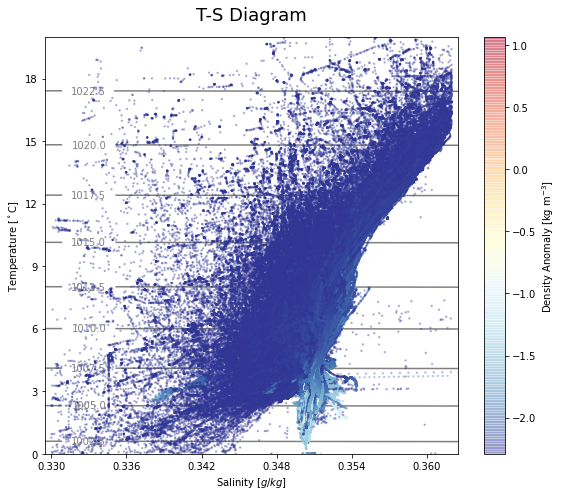

In [ ]:
############
#ESTA CELDA DEMORA 23 MIN
############

fig, ax = plt.subplots(figsize=(8, 7)) 
levels = [lev for lev in gen_levels()][0]
cs = ax.contour(sal, temp, rho, levels=n_cotour, #cmap='RdGy',
                colors='gray',
                zorder=1, extend='both') #curvas de densidad
for i in tqdm(range(rectangle_SA.shape[0]-3940),
              total= rectangle_SA.shape[0]-3940,
              desc='looping over rectangle_SA rows'):
  sc = plt.scatter(rectangle_SA[i],
                   rectangle_CT[i],
                   c=levels, s=2, alpha=0.3, 
                   cmap='RdYlBu_r') #puntos

cb = plt.colorbar(sc) #barra de color

ax.set_xlabel('Salinity [$g/kg$]', fontsize=10)
ax.set_ylabel('Temperature [$^\circ$C]', fontsize=10)
ax.set_title('T-S Diagram', fontsize=18, y=1.025)
ax.xaxis.set_major_locator(MaxNLocator(nbins=6)) #maximo numero de numeros eje x
ax.yaxis.set_major_locator(MaxNLocator(nbins=8)) #maximo numero de numeros eje y
ax.tick_params(direction='out') #posición externa de las lineas de posición de los numeros del eje
cb.ax.tick_params(direction='out') #posición externa de las lineas de posición de los numeros de la barra
cb.set_label('Density Anomaly [kg m$^{-3}$]')
ax.set_xlim(mins-.0005,maxs+.0005)
ax.set_ylim(mint-.0005,maxt+.0005)
#Esto ubica las etiquetas de las isolineas para que se vean
manual_locations = [(0.333, 1), (0.333, 2), (0.333, 4), (0.333, 6), 
                    (0.333, 8), (0.333, 10), (0.333, 12),
                    (0.333, 15), (0.333, 18)]
ax.clabel(cs, fontsize=10, inline=1, 
          manual=manual_locations, 
          fmt = '%.1f') #labels de las curvas
plt.tight_layout()

del levels, #temp, sal, sigma_theta #eliminamos para no llenar memoria
plt.tight_layout()
pathdir = "/content/drive/MyDrive/ULPGC/Singulares/Poster/"
plt.savefig(pathdir+'TS_all.png', dpi=300)
plt.show()

Ahora lo vemos por 

In [ ]:
def list_duplicates_of(seq,item):
    start_at = -1
    locs = []
    while True:
        try:
            loc = seq.index(item,start_at+1)
        except ValueError:
            break
        else:
            locs.append(loc)
            start_at = loc
    return locs

In [ ]:
from matplotlib.ticker import MaxNLocator
inter_curv = 1 #intervalo de curvas de densidad
profile_x_year = 10 #cantidad de profiles por ano elegidos al azar
n_datos = rectangle_SA.shape[1] # numero de datos profundidad o filas de df
n_cotour = 10 #cantidad de isolineas
mint, maxt = (0, 20) #val minimo y maximo de temperatura
mins, maxs = (0.33, 0.362) #val minimo y maximo de salinidad
year = 2020 #year de los datos

temp = np.linspace(mint-1, maxt+1, n_datos) #25 numeros igualmente espaciados en el intervalo de temperatura
sal = np.linspace(mins-1, maxs+1, n_datos) #25 numeros igualmente espaciados en el intervalo de salinidadm
pressu = np.linspace(min_P-1, max_P+1, n_datos)

In [ ]:
temp, sal = np.meshgrid(temp, sal) #crea una matriz a partir de dos vectores temp y sal

rho = gsw.rho(sal, temp, pressu) #anomalía de densidad potencial con respecto a una presión de referencia de 0 dbar, 
                                    #es decir, densidad potencial - 1000 kg / m ^ 3.
sigma_theta = gsw.sigma0(sal, temp)
def gen_levels():
  yield np.linspace(sigma_theta.min(), sigma_theta.max(), n_datos)
#levels = np.linspace(sigma_theta.min(), sigma_theta.max(), n_datos) #23 numeros igualmente espaciados dentro del rango sigma_theta

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
year_id = [id for id in list_duplicates_of(list_years_CTD, year) if id<rectangle_SA.shape[0]]

In [ ]:
fig, ax = plt.subplots(figsize=(8, 7)) 
levels = [lev for lev in gen_levels()][0]
cs = ax.contour(sal, temp, rho, levels=n_cotour, #cmap='RdGy',
                colors='gray',
                zorder=1, extend='both') #curvas de densidad
for i in tqdm(year_id,
              total= len(year_id),
              desc='looping over rectangle_SA rows'):
  sc = plt.scatter(rectangle_SA[i],
                   rectangle_CT[i],
                   c=levels, s=2, alpha=0.3, 
                   cmap='RdYlBu_r') #puntos

cb = plt.colorbar(sc) #barra de color

ax.set_xlabel('Salinity [$g/kg$]', fontsize=10)
ax.set_ylabel('Temperature [$^\circ$C]', fontsize=10)
ax.set_title(f'T-S Diagram {year}', fontsize=18, y=1.025)
ax.xaxis.set_major_locator(MaxNLocator(nbins=6)) #maximo numero de numeros eje x
ax.yaxis.set_major_locator(MaxNLocator(nbins=8)) #maximo numero de numeros eje y
ax.tick_params(direction='out') #posición externa de las lineas de posición de los numeros del eje
cb.ax.tick_params(direction='out') #posición externa de las lineas de posición de los numeros de la barra
cb.set_label('Density Anomaly [kg m$^{-3}$]')
ax.set_xlim(mins-.0005,maxs+.0005)
ax.set_ylim(mint-.0005,maxt+.0005)
#Esto ubica las etiquetas de las isolineas para que se vean
manual_locations = [(0.333, 1), (0.333, 2), (0.333, 4), (0.333, 6), 
                    (0.333, 8), (0.333, 10), (0.333, 12),
                    (0.333, 15), (0.333, 18)]
ax.clabel(cs, fontsize=10, inline=1, 
          manual=manual_locations, 
          fmt = '%.1f') #labels de las curvas
plt.tight_layout()

del levels, #temp, sal, sigma_theta #eliminamos para no llenar memoria
plt.tight_layout()
pathdir = "/content/drive/MyDrive/ULPGC/Singulares/Poster/"
plt.savefig(pathdir+f'TS_{year}.png', dpi=300)
plt.show()

## NAO

In [ ]:
!wget -O NAO_1950_2022.txt https://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii.table

--2022-04-01 00:44:36--  https://www.cpc.ncep.noaa.gov/products/precip/CWlink/pna/norm.nao.monthly.b5001.current.ascii.table
Resolving www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)... 140.90.101.19
Connecting to www.cpc.ncep.noaa.gov (www.cpc.ncep.noaa.gov)|140.90.101.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6427 (6.3K) [text/plain]
Saving to: ‘NAO_1950_2022.txt’

NAO_1950_2022.txt   100%[===================>]   6.28K  --.-KB/s    in 0s      

2022-04-01 00:44:37 (1.29 GB/s) - ‘NAO_1950_2022.txt’ saved [6427/6427]



In [ ]:
cols = ['year', 'Jan', 'Fab', 'Mar', 'Apr', 'May', 
          'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dic']
df_NAO = pd.read_table("/content/NAO_1950_2022.txt", delimiter="  ", 
                       names= cols).set_index('year').mean(axis=1)
darr_NAO = df_NAO.to_xarray()
darr_NAO

<xarray.DataArray (year: 73)>
array([-0.12083333, -0.00833333, -0.425     , -0.0175    ,  0.0025    ,
       -0.39916667, -0.04416667, -0.19583333, -0.58916667,  0.3525    ,
       -0.41      ,  0.04333333, -0.34166667, -0.41666667, -0.04166667,
       -0.13      , -0.32833333,  0.36666667, -0.94      , -0.05833333,
       -0.25333333,  0.01      ,  0.51      , -0.08666667,  0.18083333,
       -0.07416667,  0.1875    , -0.33583333,  0.3175    ,  0.135     ,
       -0.4125    , -0.2125    ,  0.43      ,  0.31      ,  0.2475    ,
       -0.18333333,  0.50333333, -0.1225    , -0.01333333,  0.70166667,
        0.59416667,  0.26833333,  0.58083333,  0.17916667,  0.57583333,
       -0.08083333, -0.21416667, -0.15666667, -0.48083333,  0.39083333,
        0.20666667, -0.1825    ,  0.03916667,  0.0975    ,  0.2425    ,
       -0.2675    , -0.2075    ,  0.17333333, -0.37833333, -0.24333333,
       -1.1525    ,  0.29333333, -0.45583333,  0.21      ,  0.18666667,
        0.43333333, -0.03833333,  0.22583333,  1.08333333, -0.31833333,
        0.29083333, -0.39833333,  1.38      ])
Coordinates:
  * year     (year) int64 1950 1951 1952 1953 1954 ... 2018 2019 2020 2021 2022

In [ ]:
df_NAO

year
1950   -0.120833
1951   -0.008333
1952   -0.425000
1953   -0.017500
1954    0.002500
          ...   
2018    1.083333
2019   -0.318333
2020    0.290833
2021   -0.398333
2022    1.380000
Length: 73, dtype: float64

Text(0.5, 1.0, 'NAO Index')

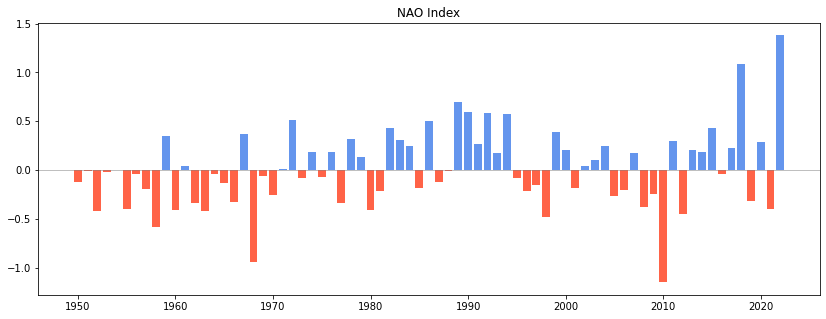

In [ ]:
plt.figure(figsize=(14,5))
plt.bar(df_NAO[df_NAO < 0].index,df_NAO[df_NAO < 0], color='tomato') 
plt.bar(df_NAO[df_NAO > 0].index,df_NAO[df_NAO > 0], color='cornflowerblue') 
plt.axhline(0, color='grey', lw=0.5)
plt.title('NAO Index')

## Nitratos

Obtenidos de un modelo *NASA Ocean Biogeochemical Model assimilating satellite chlorophyll data global monthly VR2017 (NOBM_MON)* 

https://disc.gsfc.nasa.gov/datasets/NOBM_MON_R2017/summary

In [ ]:
!wget https://github.com/gacuervol/ULPGC/raw/main/Singulares/g4.areaAvgTimeSeries.NOBM_MON_R2017_rno.19980101-20151130.65W_46N_26W_69N.nc

--2022-03-29 02:58:13--  https://github.com/gacuervol/ULPGC/raw/main/Singulares/g4.areaAvgTimeSeries.NOBM_MON_R2017_rno.19980101-20151130.65W_46N_26W_69N.nc
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gacuervol/ULPGC/main/Singulares/g4.areaAvgTimeSeries.NOBM_MON_R2017_rno.19980101-20151130.65W_46N_26W_69N.nc [following]
--2022-03-29 02:58:13--  https://raw.githubusercontent.com/gacuervol/ULPGC/main/Singulares/g4.areaAvgTimeSeries.NOBM_MON_R2017_rno.19980101-20151130.65W_46N_26W_69N.nc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71883 (70K) [application/octet-stream]
Saving to: ‘g4.areaAv

In [ ]:
ds_nitrate = xr.open_dataset("g4.areaAvgTimeSeries.NOBM_MON_R2017_rno.19980101-20151130.65W_46N_26W_69N.nc")
ds_nitrate

<xarray.Dataset>
Dimensions:             (nv: 2, time: 215)
Coordinates:
  * time                (time) datetime64[ns] 1998-01-01 ... 2015-11-01
Dimensions without coordinates: nv
Data variables:
    NOBM_MON_R2017_rno  (time) float32 ...
    datamonth           (time) int32 ...
    time_bnds           (time, nv) datetime64[ns] ...
Attributes: (12/22)
    nco_openmp_thread_number:    1
    Conventions:                 CF-1.4
    temporal_resolution:         monthly
    nco_input_file_number:       2
    nco_input_file_list:         ./file_NOBM_MON_R2017_rno_1_avg.nc ./file_NO...
    geospatial_lat_min:          46.6667
    ...                          ...
    plot_hint_y_axis_label:      micromole/L
    NCO:                         netCDF Operators version 4.7.8 (Homepage = h...
    history:                     Tue Mar 29 02:47:46 2022: /usr/bin/ncatted -...
    plot_hint_time_axis_values:  946684800,1104537600,1262304000,1420070400,1...
    plot_hint_time_axis_labels:  2000,2005,2010,2015,2020
    plot_hint_caption:           - The user-selected region was defined by 65...

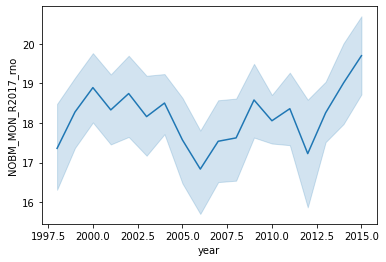

In [ ]:
df_nitrate = ds_nitrate.to_dataframe()
df_nitrate['Dates'] = pd.to_datetime(df_nitrate['time_bnds']).dt.date
df_nitrate['Time'] = pd.to_datetime(df_nitrate['time_bnds']).dt.time
df_nitrate['year'] = pd.to_datetime(df_nitrate['Dates']).dt.year
df_nitrate = df_nitrate.drop(columns=['time_bnds'])
sns.lineplot(x="year", y="NOBM_MON_R2017_rno",
             data=df_nitrate)

In [ ]:
ds_uv_year.vgosa.squeeze().sel(year=1994, method='nearest')#.plot.pcolormesh()

<xarray.DataArray 'vgosa' (time: 4, latitude: 95, longitude: 158)>
array([[[      nan,       nan, ..., -0.035593, -0.047406],
        [      nan,       nan, ..., -0.090408, -0.094339],
        ...,
        [ 0.00393 ,  0.015633, ...,       nan,       nan],
        [-0.025936, -0.021301, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]]])
Coordinates:
    year       int64 1994
  * latitude   (latitude) float32 46.12 46.38 46.62 46.88 ... 69.12 69.38 69.62
  * longitude  (longitude) float32 -65.38 -65.12 -64.88 ... -26.62 -26.38 -26.12
Dimensions without coordinates: time

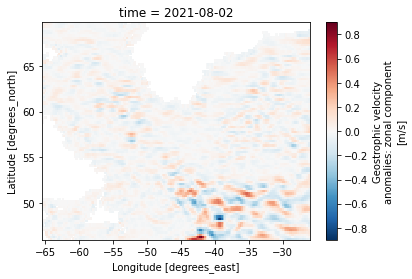

In [ ]:
ds_2021.ugosa.plot()

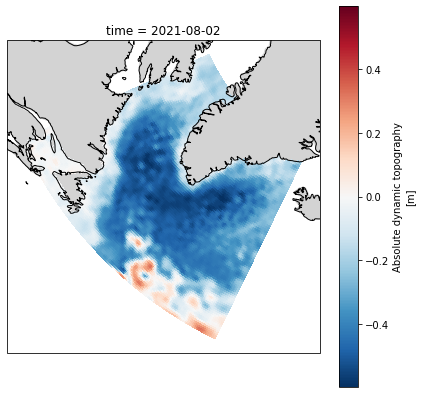

In [ ]:
map_proj = ccrs.Orthographic(central_longitude=0.0, central_latitude=90.0, globe=None);
fig = plt.figure(figsize=(7, 7))
fig.add_subplot(1,1,1, projection=map_proj)
ax = ds_adt_2021.adt.plot(transform=ccrs.PlateCarree()).axes;
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.coastlines(resolution='50m');

In [ ]:
ds_adt_2021.adt.mean()

<xarray.DataArray 'adt' ()>
array(-0.2789827)

In [ ]:
ds_new = ds_adt_2021.assign(sla= ds_adt_2021.adt - ds_adt_2021.adt.mean())
ds_new

<xarray.Dataset>
Dimensions:    (latitude: 95, longitude: 158, time: 1)
Coordinates:
  * latitude   (latitude) float32 46.12 46.38 46.62 46.88 ... 69.12 69.38 69.62
  * time       (time) datetime64[ns] 2021-08-02
  * longitude  (longitude) float32 -65.38 -65.12 -64.88 ... -26.62 -26.38 -26.12
Data variables:
    adt        (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    crs        int32 ...
    sla        (time, latitude, longitude) float64 nan nan nan ... nan nan nan
Attributes: (12/45)
    Conventions:                                    CF-1.6
    FROM_ORIGINAL_FILE__Metadata_Conventions:       Unidata Dataset Discovery...
    cdm_data_type:                                  Grid
    comment:                                        Sea Surface Height measur...
    contact:                                        servicedesk.cmems@mercato...
    creator_email:                                  servicedesk.cmems@mercato...
    ...                                             ...
    time_coverage_duration:                         P1D
    time_coverage_end:                              2021-08-02T12:00:00Z
    time_coverage_resolution:                       P1D
    time_coverage_start:                            2021-08-01T12:00:00Z
    title:                                          DT merged all satellites ...
    _CoordSysBuilder:                               ucar.nc2.dataset.conv.CF1...

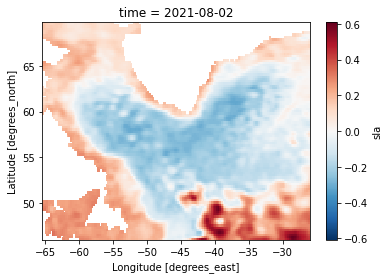

In [ ]:
ds_new.sla.plot()

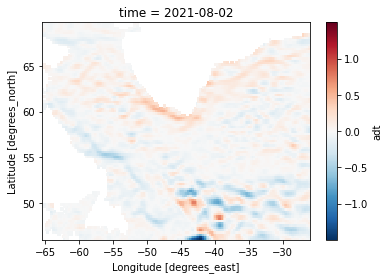

In [ ]:
dadt_dlat.plot()

In [ ]:
g = 9.80665 #m/s^2 
Ω = 2*np.pi/86400 #s^-1
f = lambda θ: 2*Ω*np.sin(θ)
Current = lambda grad,θ: g/f(θ)*grad 

In [ ]:
#dadt_dlon = ds_adt_2021.adt.differentiate('longitude')
#dadt_dlat = ds_adt_2021.adt.differentiate('latitude')
dadt_dlon = ds_new.sla.differentiate('longitude')
dadt_dlat = ds_new.sla.differentiate('latitude')
x = dadt_dlon.shape[1]
y = dadt_dlon.shape[2]
radarrLAT = np.array([math.radians(deg) for deg in np.array(ds_adt_2021.latitude.values.tolist()*y)])
radarrLON = np.array([math.radians(deg) for deg in np.array(ds_adt_2021.longitude.values.tolist()*x)])
arrlat = radarrLAT.reshape(y, -1).T
arrlon = radarrLON.reshape(x, -1)

In [ ]:
v = Current(dadt_dlon.squeeze(), arrlat)
u = Current(dadt_dlat.squeeze(), arrlon)

In [ ]:
 v.mean()

<xarray.DataArray 'sla' ()>
array(-291.39617844)
Coordinates:
    time     datetime64[ns] 2021-08-02

In [ ]:
u_a = v - v.mean()

In [ ]:
u_a

<xarray.DataArray 'sla' (latitude: 95, longitude: 158)>
array([[            nan,             nan,             nan, ...,
         -5245.91832707,  -5956.78978386,  -5844.54692227],
       [            nan,             nan,             nan, ...,
         -7961.32484305,  -8240.76234942,  -6489.62064283],
       [            nan,             nan,             nan, ...,
         -8966.14647213, -10839.91762986,  -9096.0117999 ],
       ...,
       [ -2854.87959303,  -1974.49967533,   -892.06535028, ...,
                    nan,             nan,             nan],
       [ -4117.64117978,  -3382.80162008,  -2691.18791683, ...,
                    nan,             nan,             nan],
       [ -2441.77890357,  -2484.93429961,  -2197.23165939, ...,
                    nan,             nan,             nan]])
Coordinates:
  * latitude   (latitude) float32 46.12 46.38 46.62 46.88 ... 69.12 69.38 69.62
    time       datetime64[ns] 2021-08-02
  * longitude  (longitude) float32 -65.38 -65.12 -64.88 ... -26.62 -26.38 -26.12

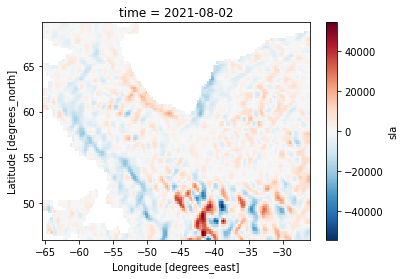

In [ ]:
u_a.plot()

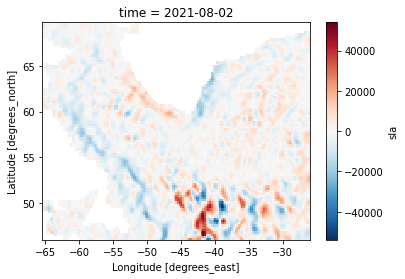

In [ ]:
v.plot()